# Predicting Melbourne House Prices
## Phase 1: Data Preparation & Visualisation

#### Group Name:

#### Name(s) & ID(s) of Group Members:

#### 

***
(Credit: A. C. & I. P.)

**DISCLAIMER:** Please do not assume this report is 100% accurate nor it fully satisfies all the project requirements for full credit.
***

## Table of Contents
* [Introduction](#itr) 
  + [Dataset Source](#Dataset-Source)
  + [Dataset Details](#Dataset-Details)
  + [Dataset Features](#Dataset-Features)
  + [Target Feature](#Target-Feature)
* [Goals and Objectives](#Goals-and-Objectives)
* [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
* [Data Exploration and Visualisation](#Data-Exploration-and-Visualisation)
* [Summary and Conclusion](#Summary-and-Conclusion)
* [References](#References)



## Introduction <a id='itr'></a>

### Dataset Source

The Melbourne House Prices dataset used in study was sourced from Kaggle (Becker, 2021). This dataset contains prices of houses sold in Melbourne between January 2016 and September 2017.



### Dataset Details

The dataset is about the housing market in Melbourne and contains information about the house sale price, location, and the brokering real estate agency. Additional features included in this dataset are the date of sale, year built, number of rooms & bathrooms, distance to city center, land size, suburb, and the number of properties within the suburb. These features seem to be sufficient for an attempt for predictive modeling of Melbourne house prices as a regression problem.

This dataset has a total of 20 features (excluding the street address of houses) and 13580 observations. Houses with no price information have already been removed from the dataset. 

**Dataset Retrieval**

- We read in the dataset from our GitHub repository and load the modules we will use throughout this report.
- We display 10 randomly sampled rows from this dataset.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

pd.set_option('display.max_columns', None) 

###
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn-v0_8")
###

In [2]:
# name of the dataset to be imported from our GitHub account
df_name = 'melbourne_house_prices.csv'

In [3]:
df_url = 'https://raw.githubusercontent.com/akmand/datasets/master/' + df_name
url_content = requests.get(df_url, verify=False).content
melb_df = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

In [4]:
melb_df.sample(10, random_state=999)

,Date,Suburb,Rooms,Type,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price
8563,12/11/2016,Doncaster,4,h,S,Ray,13.9,3108,4,2,2.0,806,170.0,1975.0,Manningham,-37.79390,145.13920,Eastern Metropolitan,9028,1468000
3552,24/06/2017,Reservoir,1,u,PI,Stockdale,12.0,3073,1,1,1.0,0,60.0,1980.0,Darebin,-37.71408,145.00441,Northern Metropolitan,21650,270000
11403,26/07/2016,Moorabbin,4,h,S,Buxton,14.6,3189,4,1,2.0,592,NaN,NaN,Kingston,-37.94070,145.04820,Southern Metropolitan,2555,921000
8475,19/11/2016,Windsor,2,u,SP,Jellis,5.1,3181,2,2,1.0,0,111.0,2007.0,Port Phillip,-37.85630,144.99160,Southern Metropolitan,4380,1200000
9442,8/10/2016,Parkville,1,u,S,Jellis,2.6,3052,1,1,1.0,0,NaN,NaN,Melbourne,-37.78640,144.94090,Northern Metropolitan,2309,352500
12848,14/05/2016,Elwood,3,t,S,Chisholm,7.7,3184,3,1,1.0,0,NaN,NaN,Port Phillip,-37.88080,144.98930,Southern Metropolitan,8989,940000
3034,1/07/2017,Bentleigh,3,h,SP,hockingstuart,11.4,3204,3,1,1.0,401,114.0,1970.0,Glen Eira,-37.92999,145.04932,Southern Metropolitan,6795,1045000
4320,3/06/2017,South Morang,4,h,S,Harcourts,20.5,3752,4,3,2.0,624,410.0,2005.0,Whittlesea,-37.63485,145.07272,Northern Metropolitan,7969,915000
5879,8/04/2017,Altona,3,h,SP,hockingstuart,13.8,3018,3,1,2.0,577,NaN,NaN,Hobsons Bay,-37.86400,144.81610,Western Metropolitan,5301,840000
8112,27/11/2016,Port Melbourne,2,u,S,Chisholm,3.8,3207,2,1,1.0,0,100.0,2000.0,Port Phillip,-37.84240,144.94490,Southern Metropolitan,8648,735000


### Dataset Features

The features in our dataset are described in the table below. These descriptions are taken from the Kaggle data source.

In [5]:
# !pip install tabulate

from tabulate import tabulate

table = [['Name','Data Type','Units','Description'],
         ['Suburb','Nominal categorical','NA','Suburb of house sold'],
         ['Rooms','Numeric','NA','Number of rooms'],
         ['Type','Nominal categorical','NA','br - bedroom(s); h - house, cottage, villa, semi, terrace; \
          \nu - unit, duplex; t - townhouse; dev site - development site; \no res - other residential.'],
         ['Price','Numeric','AUD','Price of house sold'],
         ['Method','Nominal categorical','NA','S - property sold; SP - property sold prior; \
         \nPI - property passed in; PN - sold prior not disclosed; SN - \
          \nsold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn \
          \nprior to auction; SA - sold after auction; SS - sold after auction \
          \nprice not disclosed. N/A - price or highest bid not available.'],
         ['SellerG','Nominal categorical','NA','Real estate agent'],
         ['Date','Date','dd/mm/yyyy','Date sold'],
         ['Distance','Numeric','KM','Distance from Central Business District'],
         ['Bathroom','Numeric','NA','Number of bathrooms'],
         ['Car','Numeric','NA','Number of carspots'],
         ['Landsize','Numeric','Square Meter','Land size'],
         ['Building area','Numeric','Square Meter','Building size'],
         ['Year built','Date','year','Year the house was built'],
         ['Council area','Nominal categorical','NA','Governing council for the area'],
         ['Lattitude','Numeric','Degree','Lattitude'],
         ['Longtitude','Numeric','Degree','Longtitude'],
         ['Region name','Nominal categorical','NA','General Region (West, North West, etc)'],
         ['Property count','Numeric','NA','Number of properties that exist in the suburb']]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════════════╤═════════════════════╤══════════════╤═══════════════════════════════════════════════════════════════════════════════╕
│ Name           │ Data Type           │ Units        │ Description                                                                   │
╞════════════════╪═════════════════════╪══════════════╪═══════════════════════════════════════════════════════════════════════════════╡
│ Suburb         │ Nominal categorical │ NA           │ Suburb of house sold                                                          │
├────────────────┼─────────────────────┼──────────────┼───────────────────────────────────────────────────────────────────────────────┤
│ Rooms          │ Numeric             │ NA           │ Number of rooms                                                               │
├────────────────┼─────────────────────┼──────────────┼───────────────────────────────────────────────────────────────────────────────┤
│ Type           │ Nominal categorical │ NA     

### Target Feature

For this project, the target feature in this dataset will be the house price in Australian dollars. That is, the price of Melbourne houses will be predicted based on the explanatory/ descriptive variables. 

## Goals and Objectives

Melbourne has a very active housing market as demand for housing throughout the city is usually well above the supply. For this reason, a model that can accurately predict a house's selling price in Melbourne would have many real-world uses. For instance, real estate agents can provide better service to their customers using this predictive model. Likewise, banks lending out money to home buyers can better estimate the financial aspects of this home loan. Perhaps more importantly as potential home buyers, we as individuals can better figure out if we are being ripped off or we are getting a good deal provided that our predictive model is a reliable one.

Thus, the main objective of this project is two-fold: (1) predict the price of a house sold in Melbourne based on publicly available features of the house, and (2) which features seem to be the best predictors of the house sale price. A secondary objective is to perform some exploratory data analysis by basic descriptive statistics & data visualisation plots to gain some insight into the patterns and relationships existing in the data subsequent to some data cleaning & preprocessing, which is the subject of this Phase 1 report.

At this point, we make the important assumption that rows in our dataset are not correlated. That is, we assume that house price observations are independent of one another in this dataset. Of course, this is not a very realistic assumption, however, this assumption allows us to circumvent time series aspects of the underlying dynamics of house prices and also to resort to rather classical predictive models such as multiple linear regression.

## Data Cleaning and Preprocessing

In this section, we describe the data cleaning and preprocessing steps undertaken for this project.

### Data Cleaning Steps

*   Drop irrelevant features in our dataset
*   Check and rename/ modify some column names
*   Check for missing values
*   Remove all the rows with missing values 
*   Random sampling of the dataset for 5000 rows

Let's first display all the columns in our dataset.

In [6]:
melb_df.columns

Index(['Date', 'Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Distance',
       'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
       'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount', 'Price'],
      dtype='object')

`Postcode` is very similar to the `Suburb` feature, thus it is considered redundant for the model and removed. `Bedroom2` is just the number of bedrooms based on other source, which is also the same as `Rooms` feature, thus it is also considered redundant and removed. 

In [7]:
#drop irrelevant/repeated columns/features
melb_df = melb_df.drop(columns=["Postcode", "Bedroom2"]) 

As this is not a time series project, the `Date` feature is transformed into `Months` and `Years` features for the model. After transforming, the original `Date` feature is removed.

In [8]:
# Convert Date feature from string to Pandas' datatime dtype
melb_df['Date'] = pd.to_datetime(melb_df['Date'], dayfirst=True)
###
# Create Year and Month features
melb_df['year_sold'] = melb_df['Date'].dt.year
melb_df['month_sold'] = melb_df['Date'].dt.month
###
# Remove Date as we will not need it anymore
melb_df = melb_df.drop(columns=["Date"]) 

Some of the columns are not labelled properly, which will be problematic when modelling. We will make all column names lower case and replace any spaces with underscores for consistency. We will also remove any white spaces before & after column names.

In [9]:
# make column names lower case and also remove any white spaces
# before & after the column names using the strip() function
melb_df.columns = melb_df.columns.str.lower().str.strip()

columns_mapping = {
    'sellerg': 'real_estate',
    'landsize': 'land_size',
    'buildingarea': 'building_area',
    'yearbuilt': 'year_built',
    'councilarea': 'council',
    'regionname': 'region',
    'propertycount': 'property_count'    
}

# rename columns
melb_df = melb_df.rename(columns = columns_mapping)
melb_df.sample(5, random_state=999)

,suburb,rooms,type,method,real_estate,distance,bathroom,car,land_size,building_area,year_built,council,lattitude,longtitude,region,property_count,price,year_sold,month_sold
8563,Doncaster,4,h,S,Ray,13.9,2,2.0,806,170.0,1975.0,Manningham,-37.79390,145.13920,Eastern Metropolitan,9028,1468000,2016,11
3552,Reservoir,1,u,PI,Stockdale,12.0,1,1.0,0,60.0,1980.0,Darebin,-37.71408,145.00441,Northern Metropolitan,21650,270000,2017,6
11403,Moorabbin,4,h,S,Buxton,14.6,1,2.0,592,NaN,NaN,Kingston,-37.94070,145.04820,Southern Metropolitan,2555,921000,2016,7
8475,Windsor,2,u,SP,Jellis,5.1,2,1.0,0,111.0,2007.0,Port Phillip,-37.85630,144.99160,Southern Metropolitan,4380,1200000,2016,11
9442,Parkville,1,u,S,Jellis,2.6,1,1.0,0,NaN,NaN,Melbourne,-37.78640,144.94090,Northern Metropolitan,2309,352500,2016,10


Next we check the data types and observe that they match the intended data types, thus no change is needed here. 

In [10]:
# Check for data types
print(f"Shape of the dataset = {melb_df.shape} \n")
print(f"Data types are below where 'object' indicates a string type: ")
print(melb_df.dtypes)

Shape of the dataset = (13580, 19) 

Data types are below where 'object' indicates a string type: 
suburb             object
rooms               int64
type               object
method             object
real_estate        object
distance          float64
bathroom            int64
car               float64
land_size           int64
building_area     float64
year_built        float64
council            object
lattitude         float64
longtitude        float64
region             object
property_count      int64
price               int64
year_sold           int32
month_sold          int32
dtype: object


The unique values for all columns with categorical data types are displayed to check for any white spaces and other data quality issues. It turns out that the data is already clean, and no futher data cleaning steps are necessary here. 

In [11]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of categorical features</b>'))
melb_df.describe(include='object').T

,count,unique,top,freq
suburb,13580,314,Reservoir,359
type,13580,3,h,9449
method,13580,5,S,9022
real_estate,13580,268,Nelson,1565
council,12211,33,Moreland,1163
region,13580,8,Southern Metropolitan,4695


In [12]:
# To see all unique values for categorical data types
categoricalColumns = melb_df.columns[melb_df.dtypes==object].tolist()

for col in categoricalColumns:
    print('Unique values for ' + col)
    print(melb_df[col].unique())
    print('')

Unique values for suburb
['Aberfeldie' 'Airport West' 'Albanvale' 'Albert Park' 'Albion'
 'Altona Meadows' 'Altona North' 'Armadale' 'Ascot Vale' 'Ashburton'
 'Balwyn' 'Balwyn North' 'Bayswater' 'Bayswater North' 'Beaumaris'
 'Bentleigh' 'Bentleigh East' 'Berwick' 'Black Rock' 'Blackburn'
 'Blackburn North' 'Blackburn South' 'Bonbeach' 'Box Hill' 'Brighton East'
 'Broadmeadows' 'Brooklyn' 'Brunswick' 'Brunswick East' 'Brunswick West'
 'Bulleen' 'Bundoora' 'Burnside Heights' 'Burwood East' 'Camberwell'
 'Carnegie' 'Caroline Springs' 'Cheltenham' 'Clayton South' 'Coburg'
 'Craigieburn' 'Croydon' 'Deer Park' 'Delahey' 'Derrimut' 'Diamond Creek'
 'Doncaster' 'Doncaster East' 'Donvale' 'Doreen' 'Edithvale' 'Epping'
 'Essendon' 'Fawkner' 'Ferntree Gully' 'Fitzroy' 'Fitzroy North'
 'Flemington' 'Forest Hill' 'Frankston' 'Frankston South' 'Gladstone Park'
 'Glen Huntly' 'Glen Iris' 'Glen Waverley' 'Glenroy' 'Greensborough'
 'Hampton' 'Hampton East' 'Hawthorn East' 'Heidelberg'
 'Heidelberg Hei

The summary statistics are generated for all the numerical features. There does not seem to be any outliers in the data. 

In [13]:
from IPython.display import display, HTML
display(HTML('<b>Table 2: Summary of numerical features</b>'))
melb_df.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
rooms,13580.0,2.937997e+00,0.955748,1.00000,2.000000,3.000000,3.000000e+00,1.000000e+01
distance,13580.0,1.013778e+01,5.868725,0.00000,6.100000,9.200000,1.300000e+01,4.810000e+01
bathroom,13580.0,1.534242e+00,0.691712,0.00000,1.000000,1.000000,2.000000e+00,8.000000e+00
car,13518.0,1.610075e+00,0.962634,0.00000,1.000000,2.000000,2.000000e+00,1.000000e+01
land_size,13580.0,5.584161e+02,3990.669241,0.00000,177.000000,440.000000,6.510000e+02,4.330140e+05
building_area,7130.0,1.519676e+02,541.014538,0.00000,93.000000,126.000000,1.740000e+02,4.451500e+04
year_built,8205.0,1.964684e+03,37.273762,1196.00000,1940.000000,1970.000000,1.999000e+03,2.018000e+03
lattitude,13580.0,-3.780920e+01,0.079260,-38.18255,-37.856822,-37.802355,-3.775640e+01,-3.740853e+01
longtitude,13580.0,1.449952e+02,0.103916,144.43181,144.929600,145.000100,1.450583e+02,1.455264e+02
property_count,13580.0,7.454417e+03,4378.581772,249.00000,4380.000000,6555.000000,1.033100e+04,2.165000e+04


Missing values are checked by displaying the number of missing values in every column. We observe that `car`, `building_area`, `year_built` and `council` features have missing values. We decide to drop these observations for simplicity.

In [14]:
# Count missing values in each column
print(f"\nNumber of missing values for each column/ feature:")
print(melb_df.isnull().sum())


Number of missing values for each column/ feature:
suburb               0
rooms                0
type                 0
method               0
real_estate          0
distance             0
bathroom             0
car                 62
land_size            0
building_area     6450
year_built        5375
council           1369
lattitude            0
longtitude           0
region               0
property_count       0
price                0
year_sold            0
month_sold           0
dtype: int64


In [15]:
# Drop all rows with missing values/NaN
melb_df = melb_df.dropna()
melb_df.shape

(6196, 19)

### Random Sampling

As the data has more than 5000 rows, random sampling is done to get only 5000 rows out of the remaining 6196 rows for ease of computation. At the end, we display 5 random rows from our cleaned data.

In [16]:
melb_df = melb_df.sample(n=5000, random_state=999)
melb_df.shape
melb_df.sample(5, random_state=999)

,suburb,rooms,type,method,real_estate,distance,bathroom,car,land_size,building_area,year_built,council,lattitude,longtitude,region,property_count,price,year_sold,month_sold
3616,Windsor,2,h,S,hockingstuart,4.6,1,1.0,136,58.0,1892.0,Stonnington,-37.85542,144.99571,Southern Metropolitan,4380,957500,2017,6
10409,South Yarra,2,u,SP,Jellis,3.3,1,1.0,0,86.0,2003.0,Stonnington,-37.83930,144.98860,Southern Metropolitan,14887,722000,2016,9
6777,St Kilda,3,h,VB,Wilson,6.1,2,2.0,176,192.0,1880.0,Port Phillip,-37.86410,144.97390,Southern Metropolitan,13240,2000000,2017,3
7304,Brighton East,5,h,S,hockingstuart,10.7,5,3.0,1561,272.0,1969.0,Bayside,-37.91020,145.02450,Southern Metropolitan,6938,3207000,2016,12
2627,Point Cook,4,h,S,hockingstuart,14.7,2,2.0,448,190.0,2012.0,Wyndham,-37.89140,144.72014,Western Metropolitan,15542,698000,2017,7


## Data Exploration and Visualisation

Our dataset is now considered to be clean and we are ready to start visualising and explore each of the features.

### Univariate Visualisation



#### Bar Chart  of Region Name

We count the region name to see which region has the highest count in Melbourne Housing in a descending order. As we can see in Figure 1, the Southern Metropolitan has the highest number of house sold compared to the 
other regions in Melbourne. 

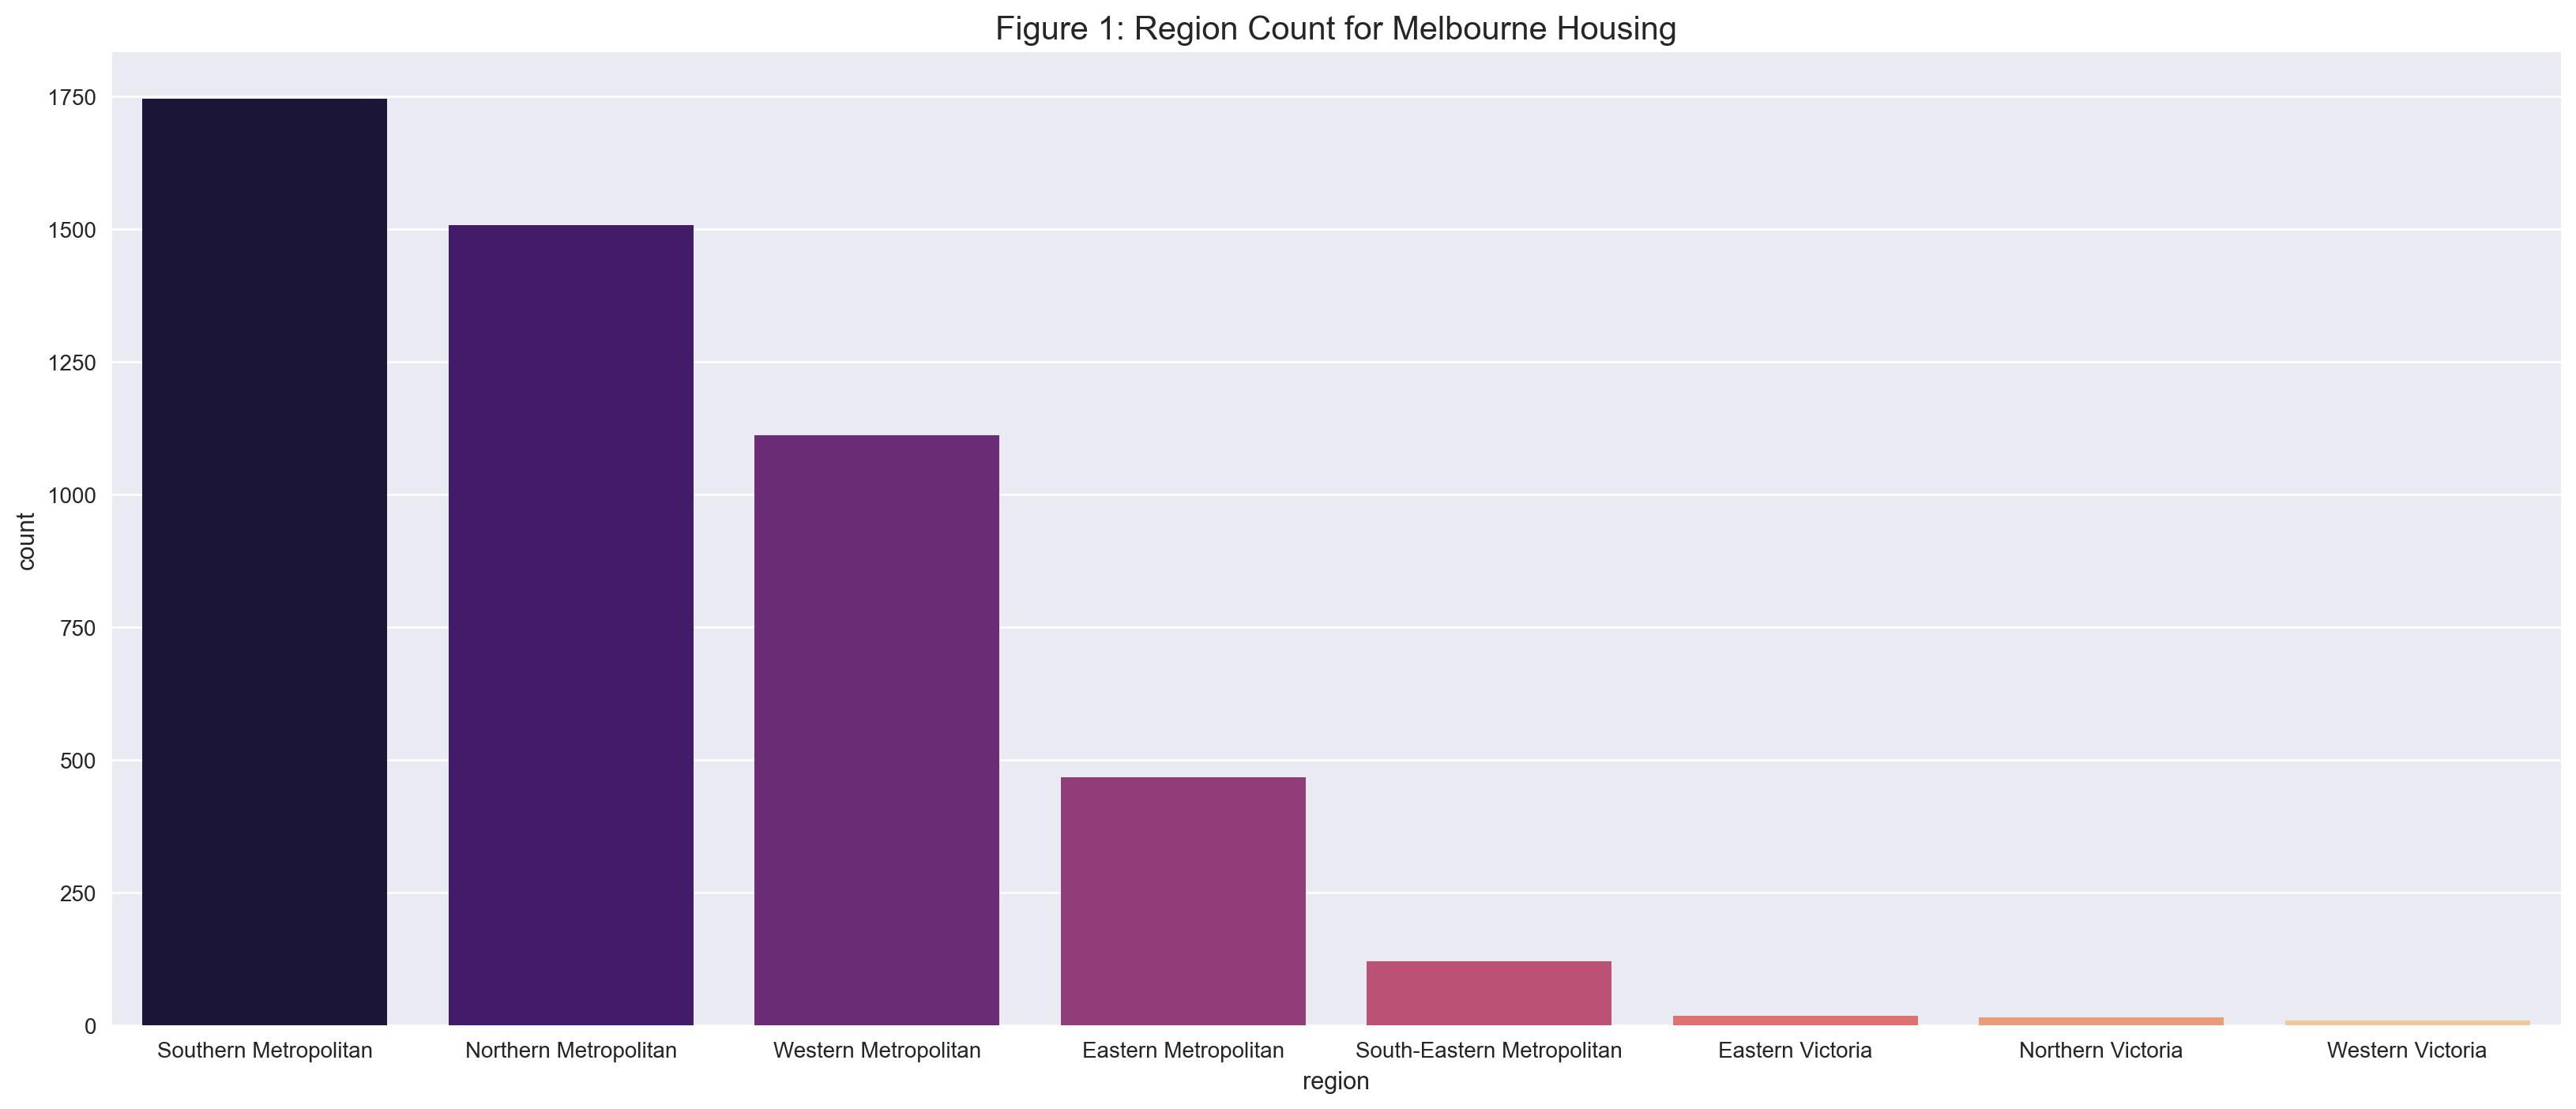

In [17]:
plt.figure(figsize = (20,8))
fig = sns.countplot(x = 'region', data = melb_df, palette = 'magma', 
                    order = melb_df['region'].value_counts().index)
fig = plt.title('Figure 1: Region Count for Melbourne Housing', fontsize = 15)
plt.show()

#### Bar Chart of Method

From Figure 2, we can see that the method "Property Sold" ("S") is the most common method used in selling house based on the dataset. 

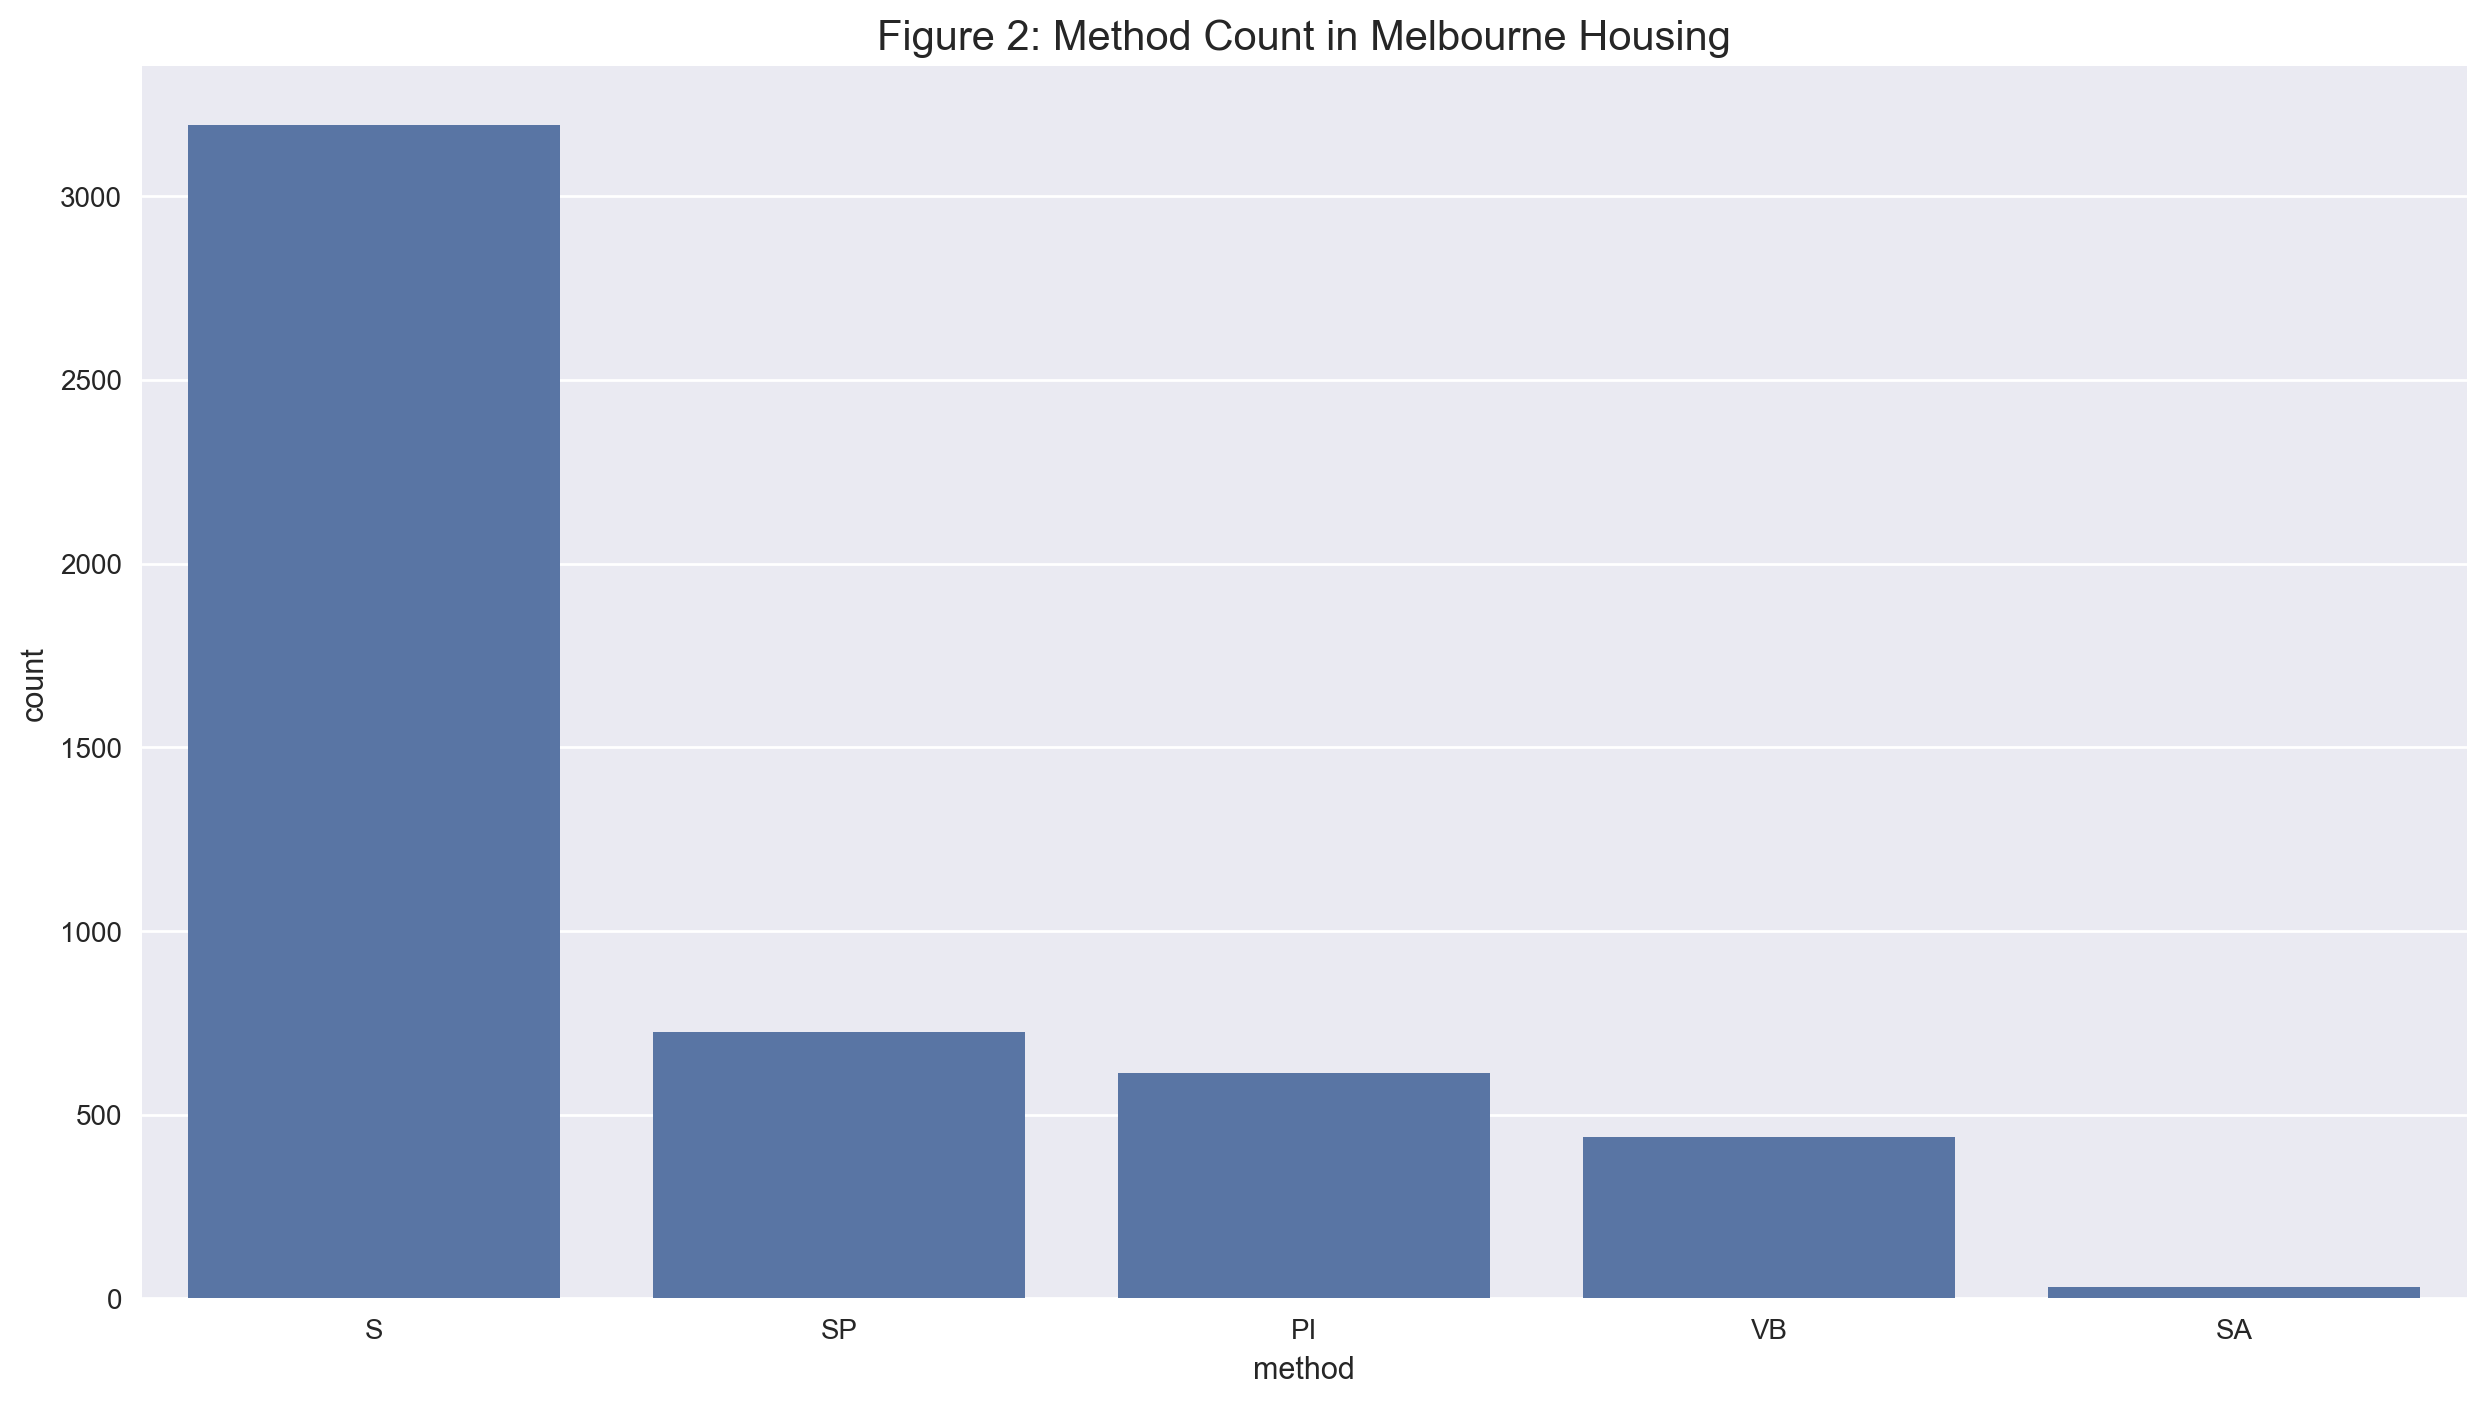

In [18]:
plt.figure(figsize = (15,8))
fig = sns.countplot(x = 'method', data = melb_df, palette = None, 
                    order = melb_df['method'].value_counts().index)
fig = plt.title('Figure 2: Method Count in Melbourne Housing', fontsize = 15)
plt.show()

#### Boxplot & Histogram of Price

We can see in Figures 3A and 3B that the distribution of price is clearly right-skewed and has a huge range, which indicates the price variable will probably need a log transformation in the second phase of the project.

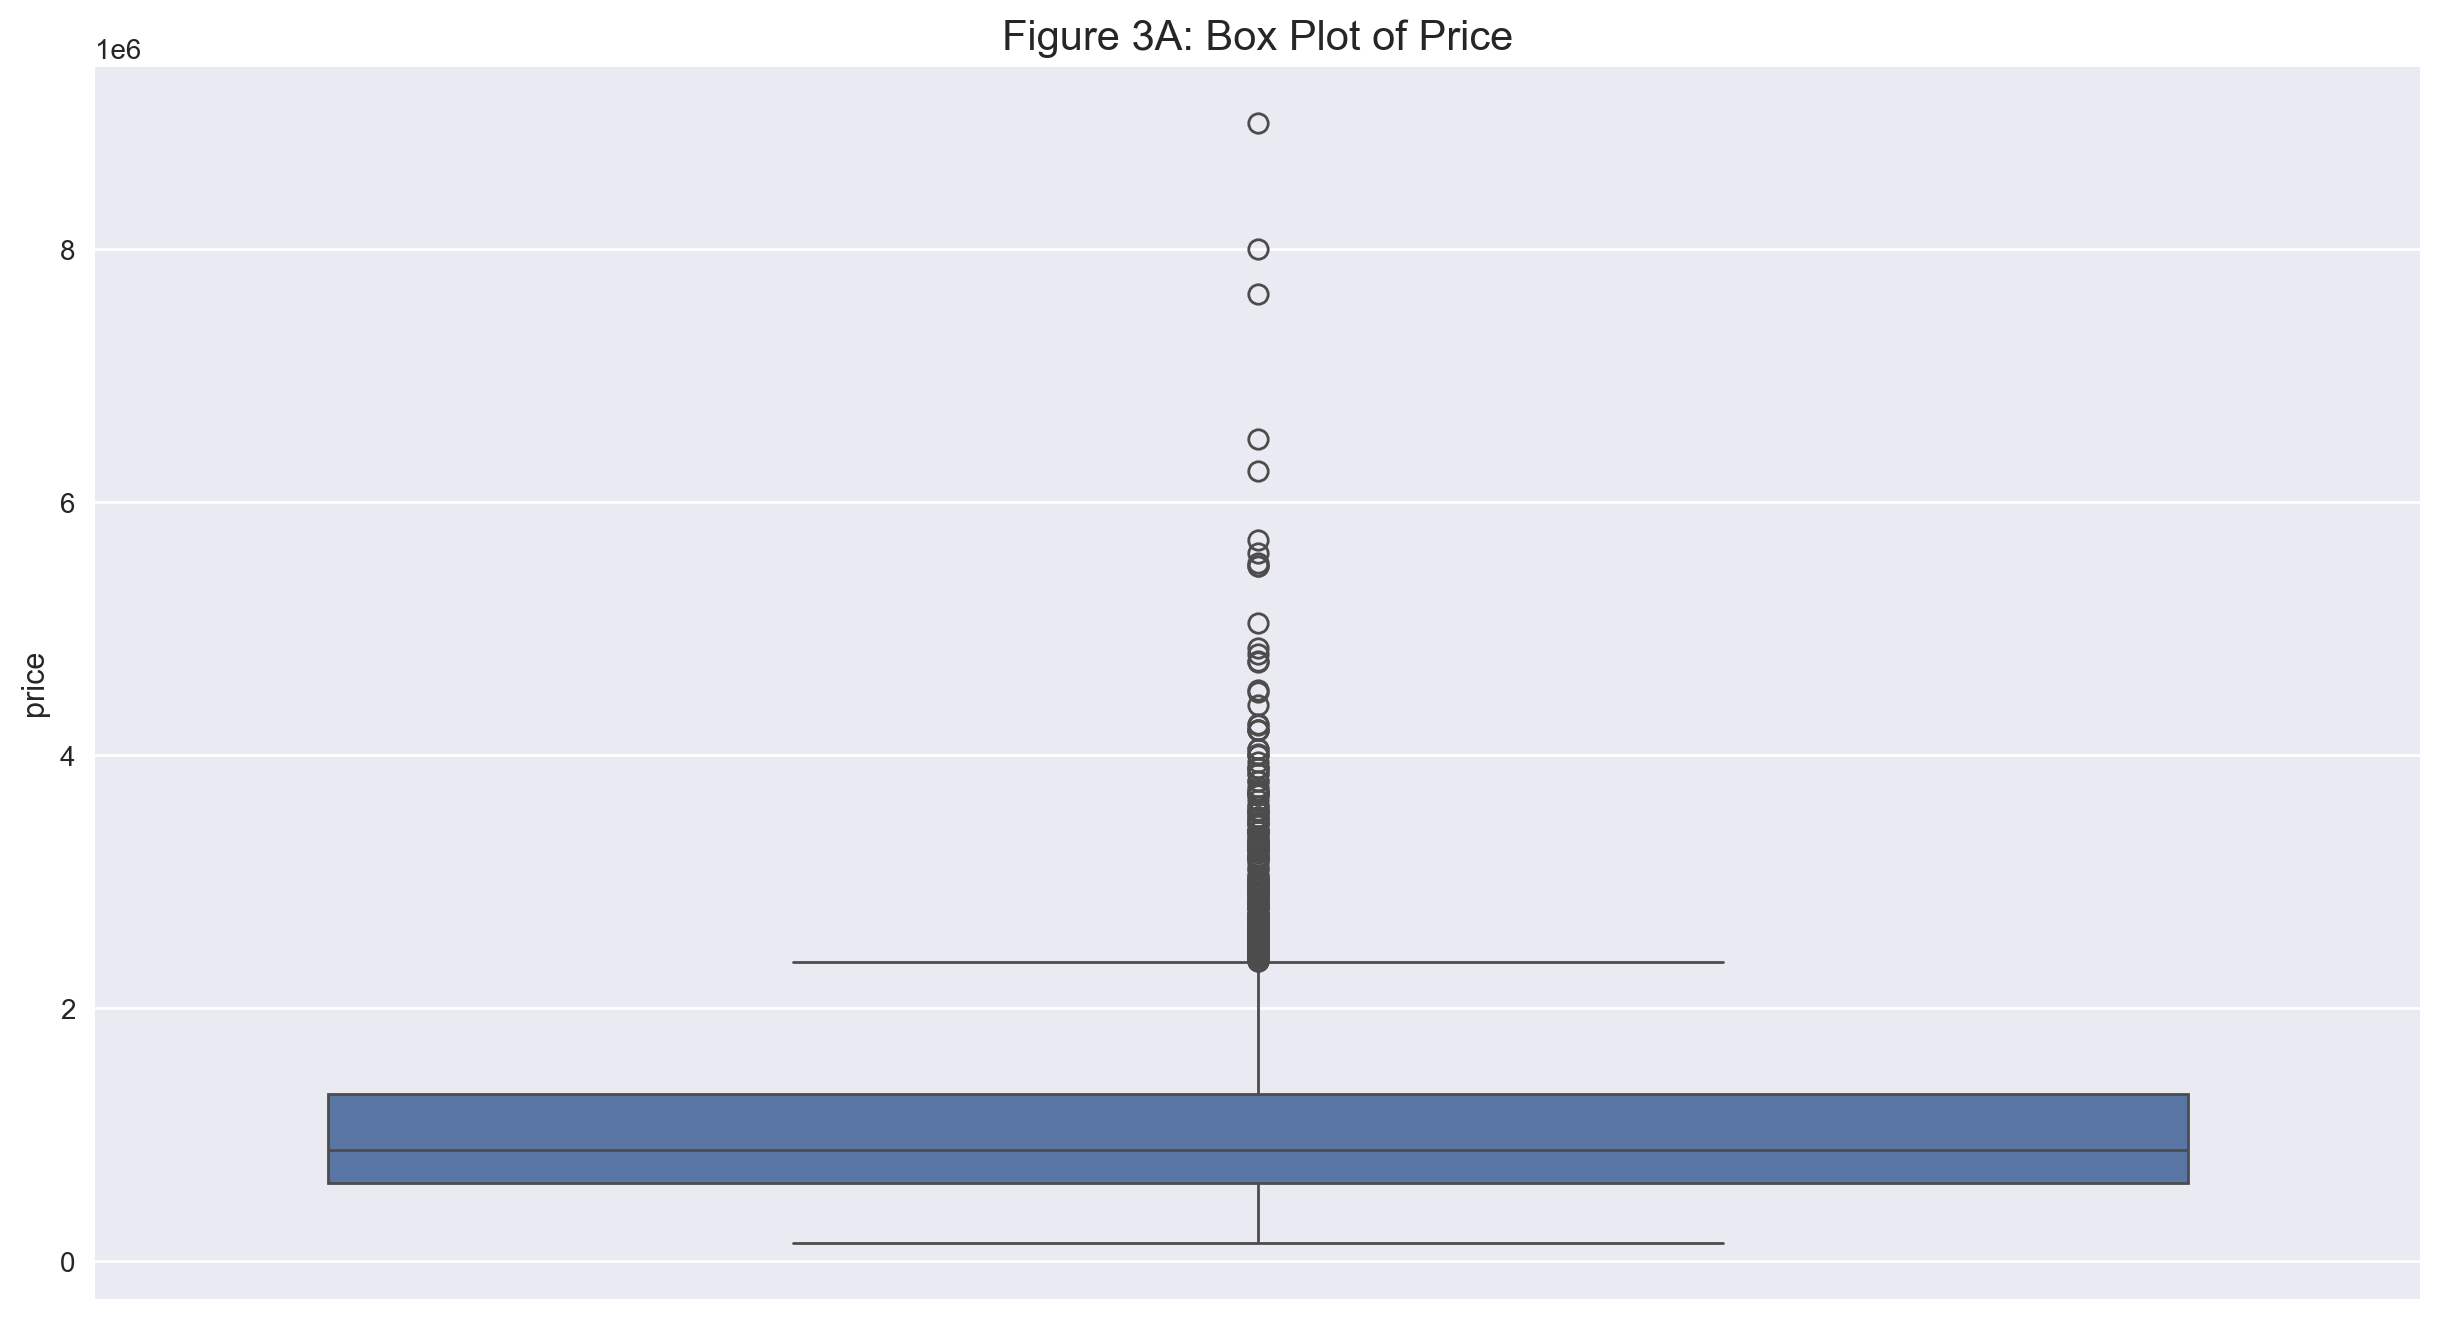

In [19]:
# Boxplot of Price
plt.figure(figsize = (15,8))
sns.boxplot(melb_df['price']).set_title('Figure 3A: Box Plot of Price', fontsize = 15)
plt.show();

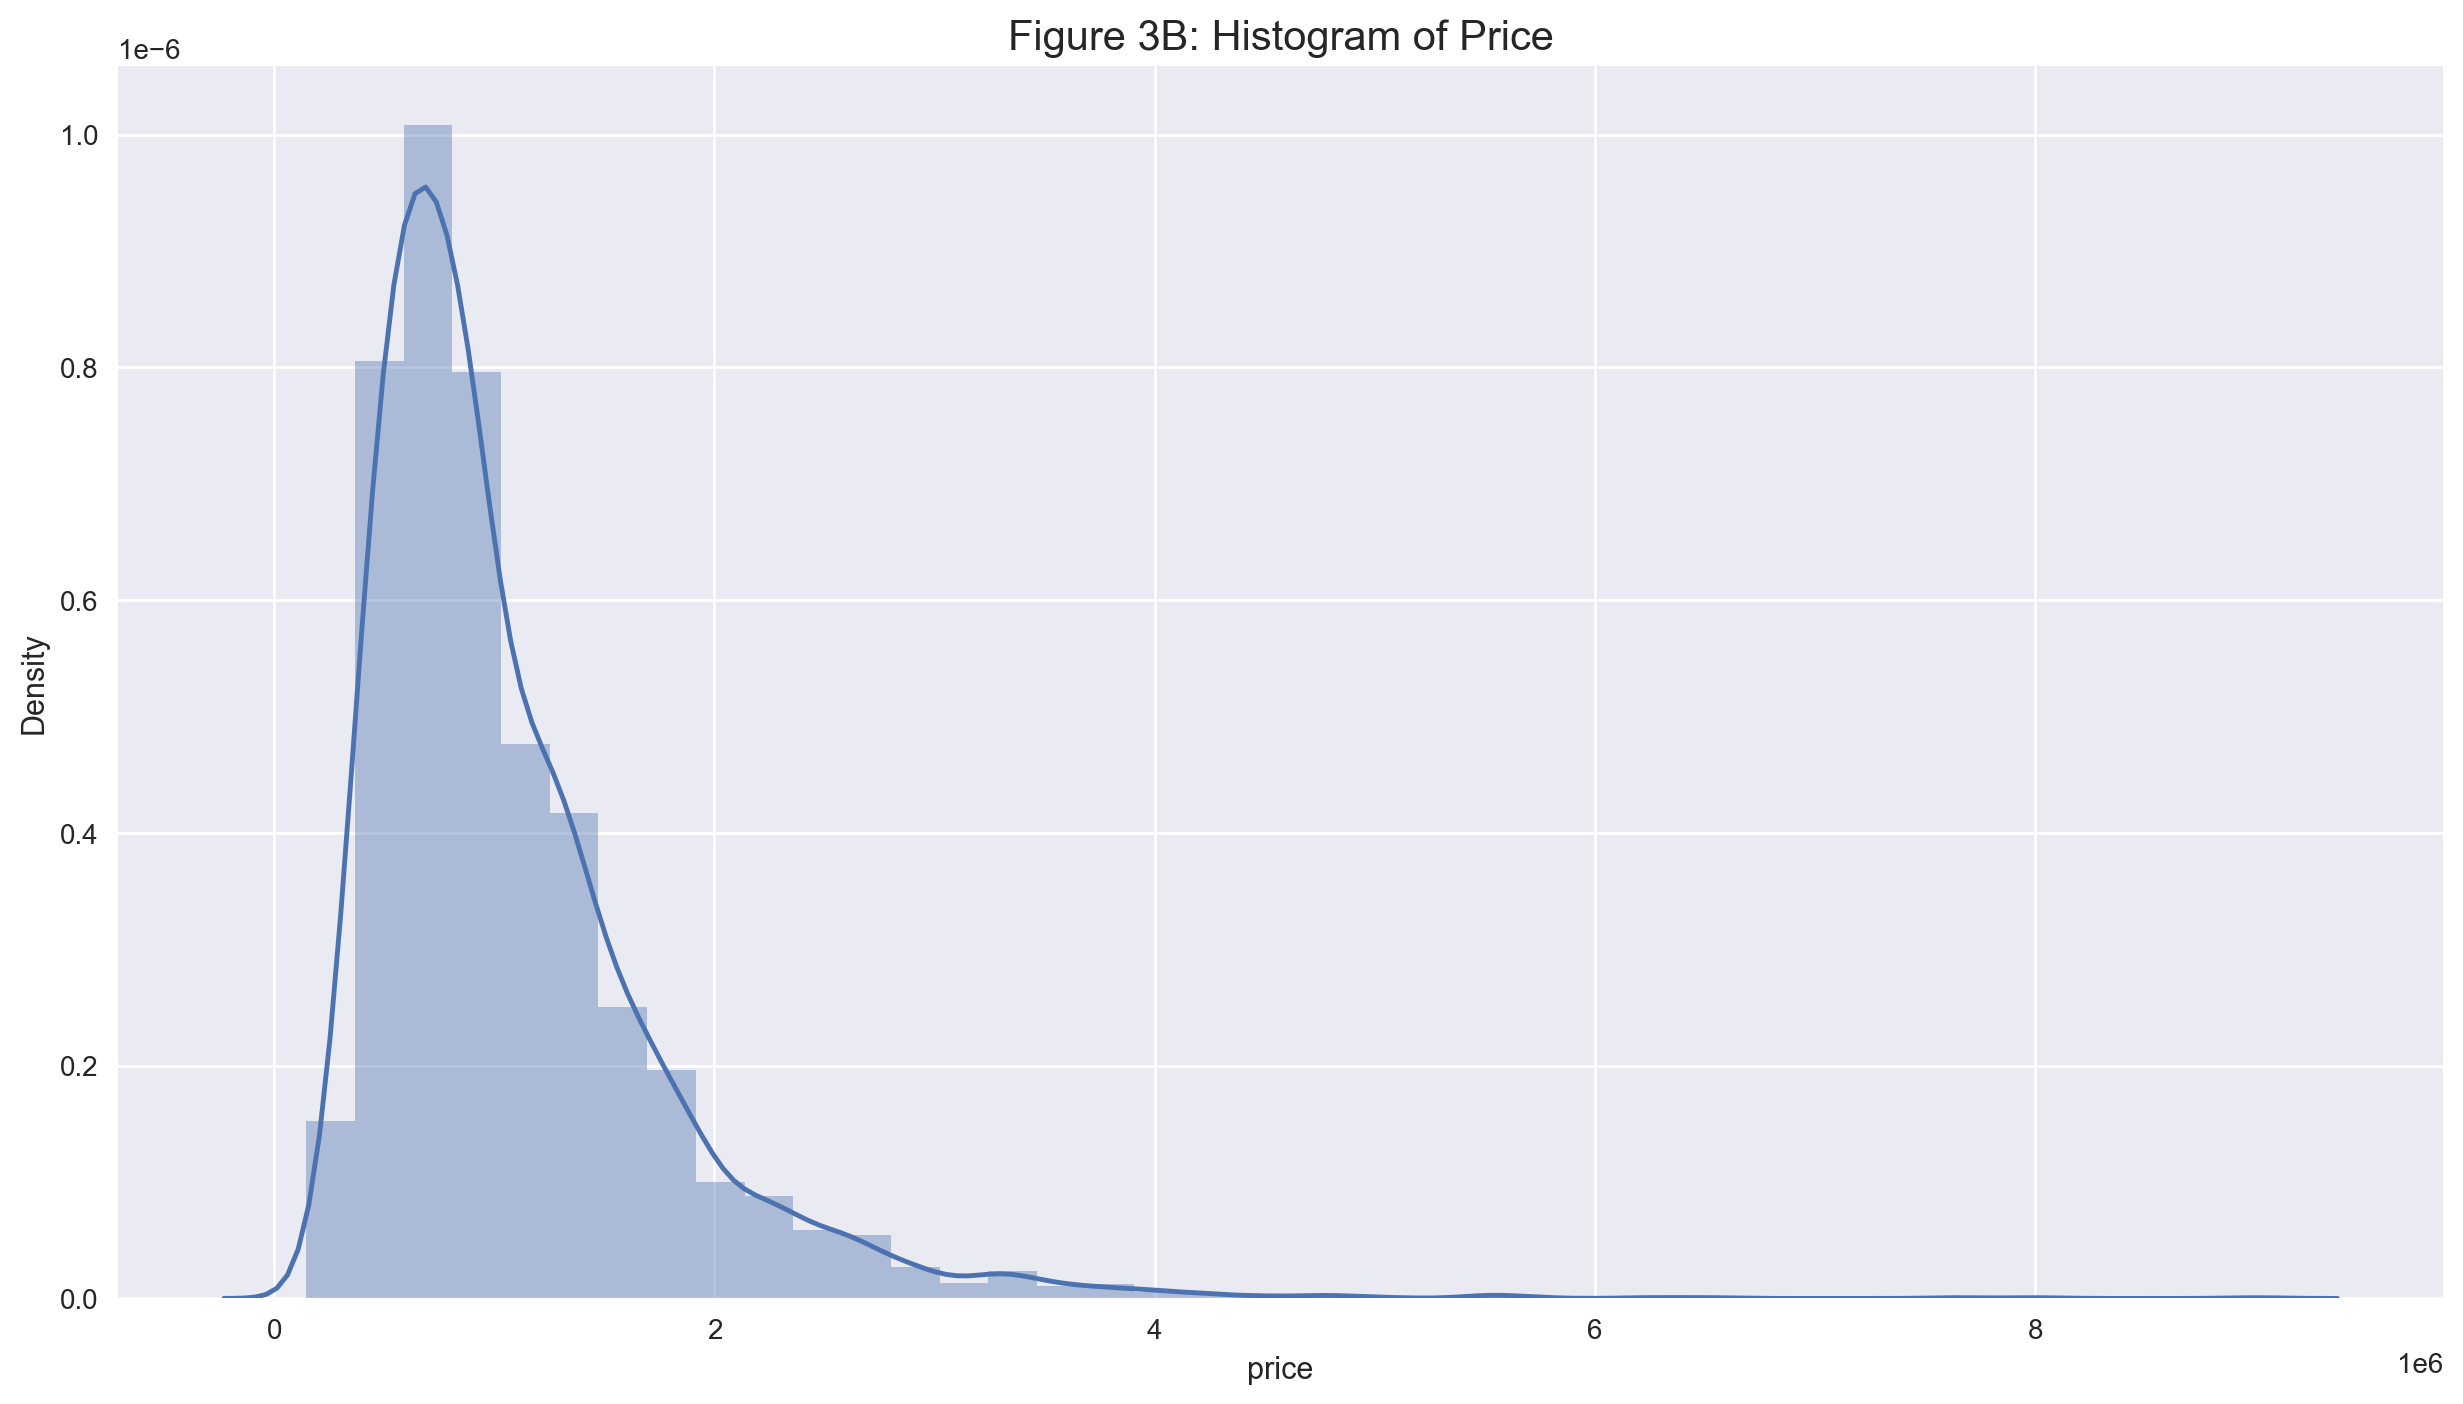

In [20]:
# Boxplot of Price
plt.figure(figsize = (15,8))
sns.distplot(melb_df['price'], kde=True, bins=40).set_title('Figure 3B: Histogram of Price', fontsize = 15)
plt.show();

### Two-Variable Visualisation

#### Scatterplot of price and distance from CBD

Figure 4 shows that there is a correlation between the distance from CBD and price. As the distance increases, the price tends to be lower. 

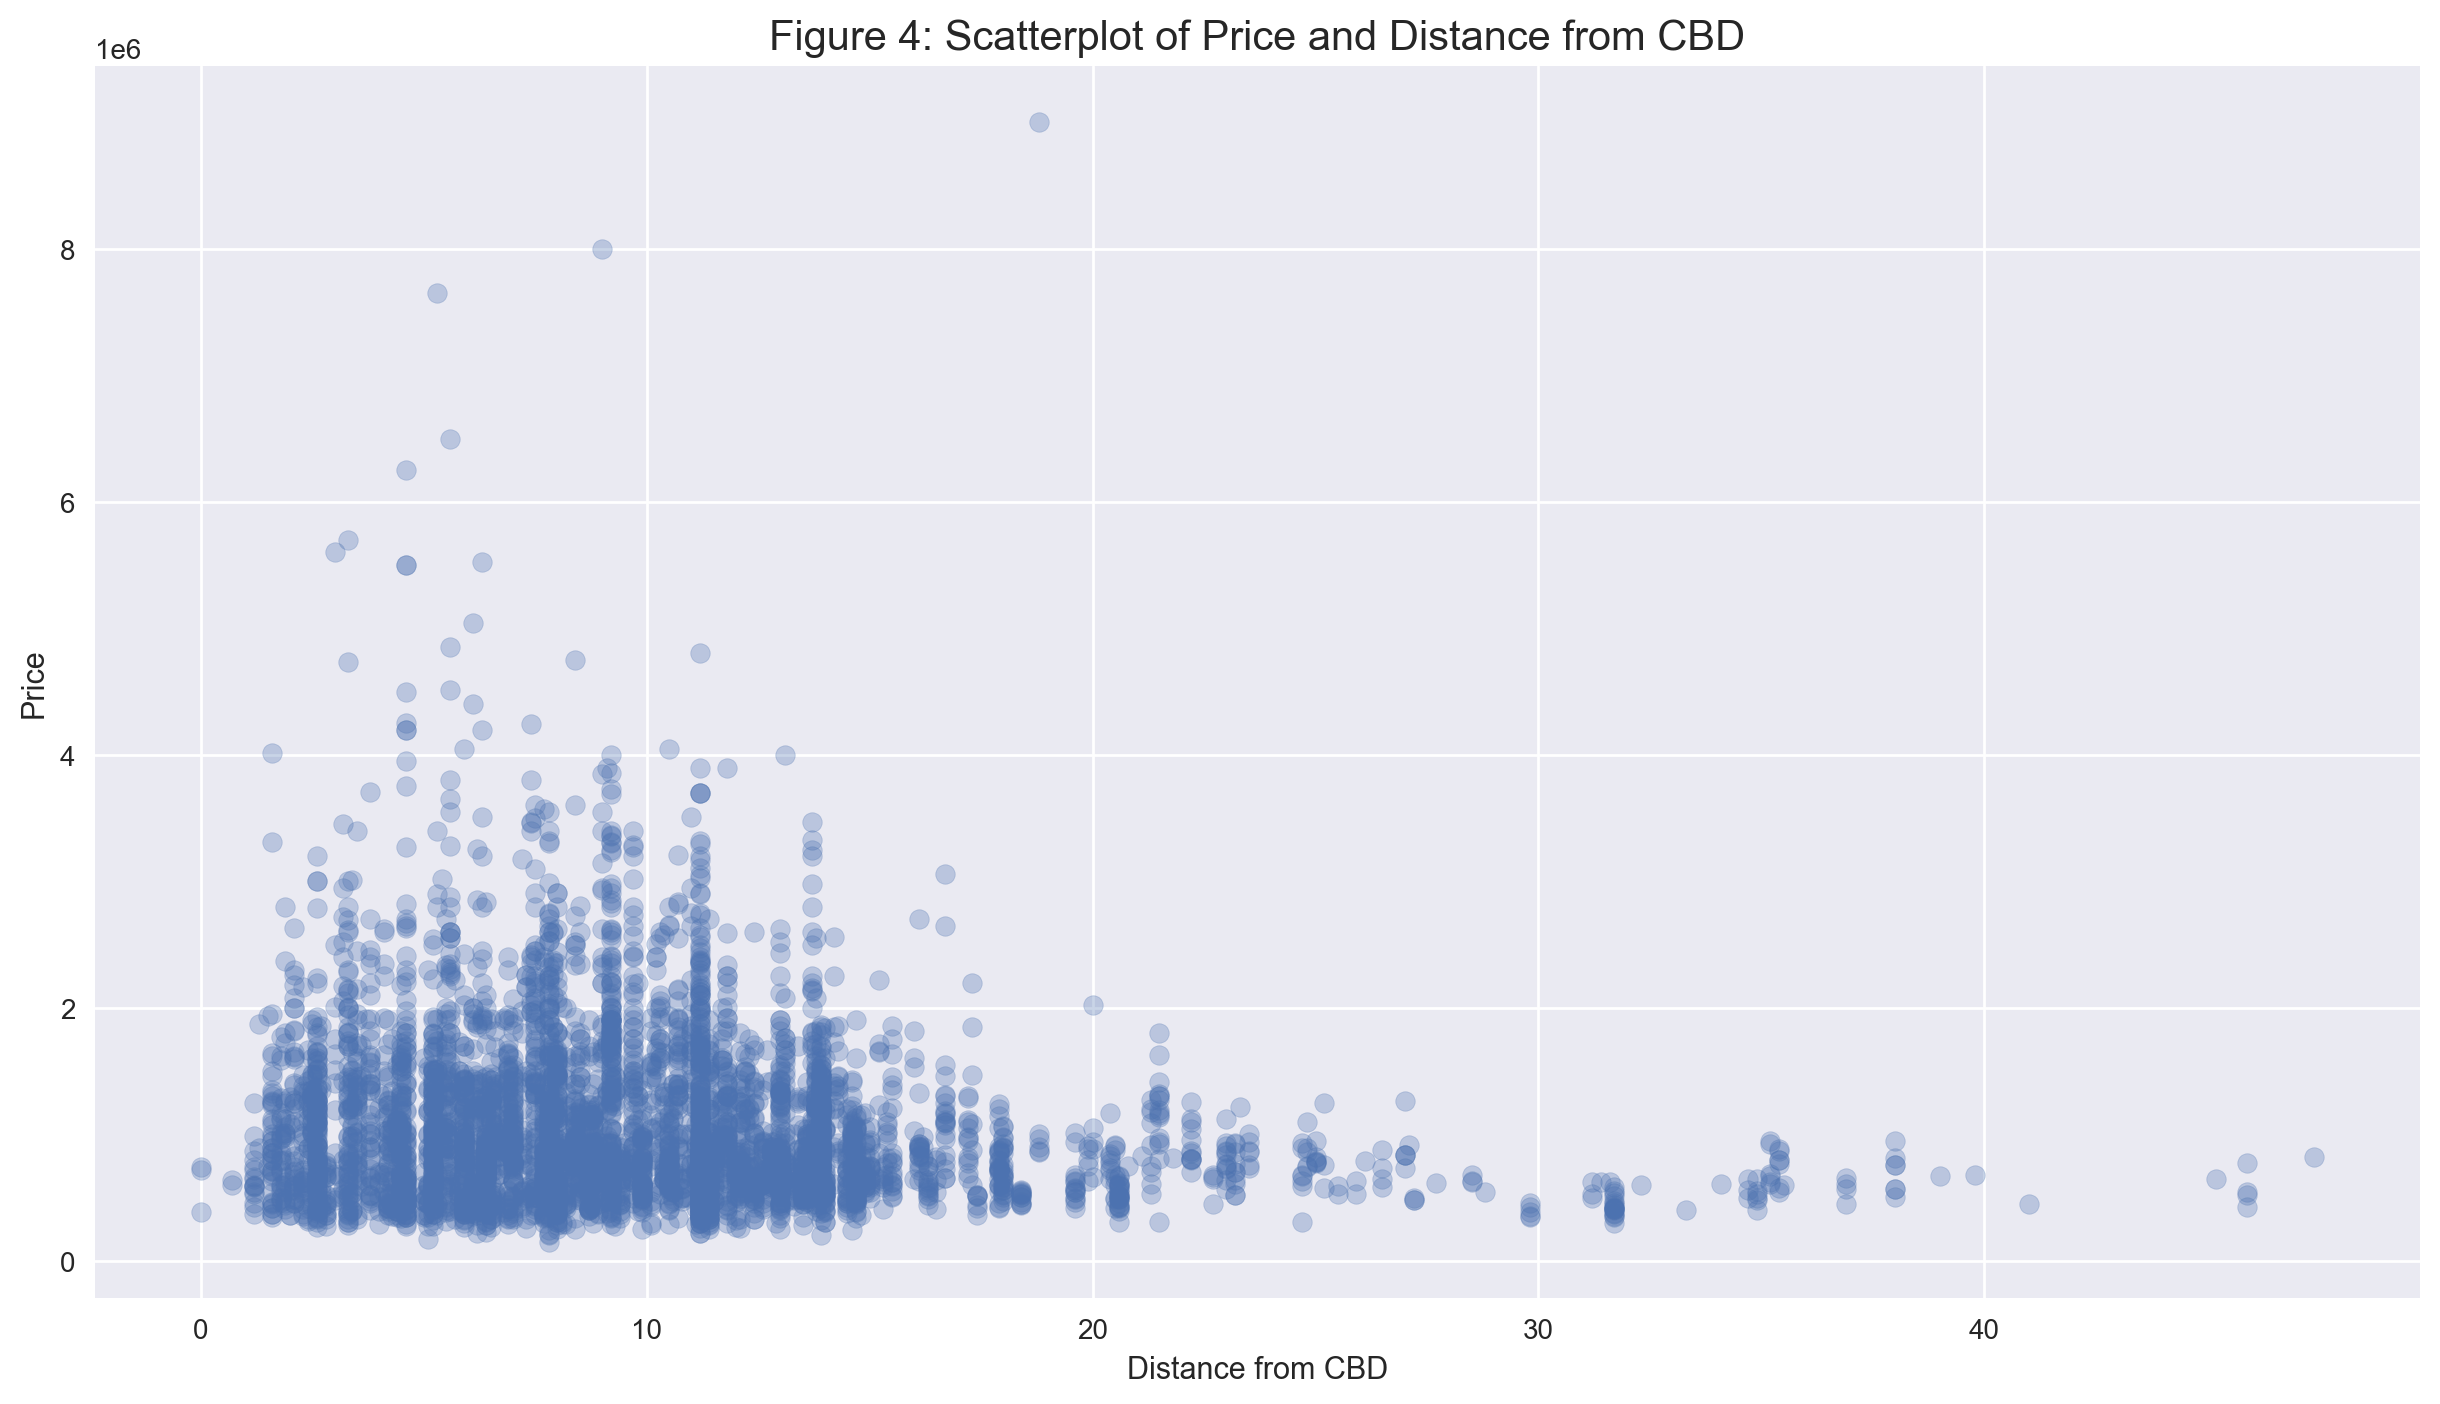

In [21]:
plt.figure(figsize = (15,8))
plt.scatter(melb_df['distance'], melb_df['price'], alpha = 0.3)
plt.title('Figure 4: Scatterplot of Price and Distance from CBD', fontsize = 15)
plt.xlabel('Distance from CBD')
plt.ylabel('Price')
plt.show();

#### Boxplot of Price by House Type

From figure 5, we can see that H type (house, cottage, villa, semi, terrace) of house have overall a higher price compared to other types. Furthermore, U (unit or duplex) house has a lower price compared to other types. 


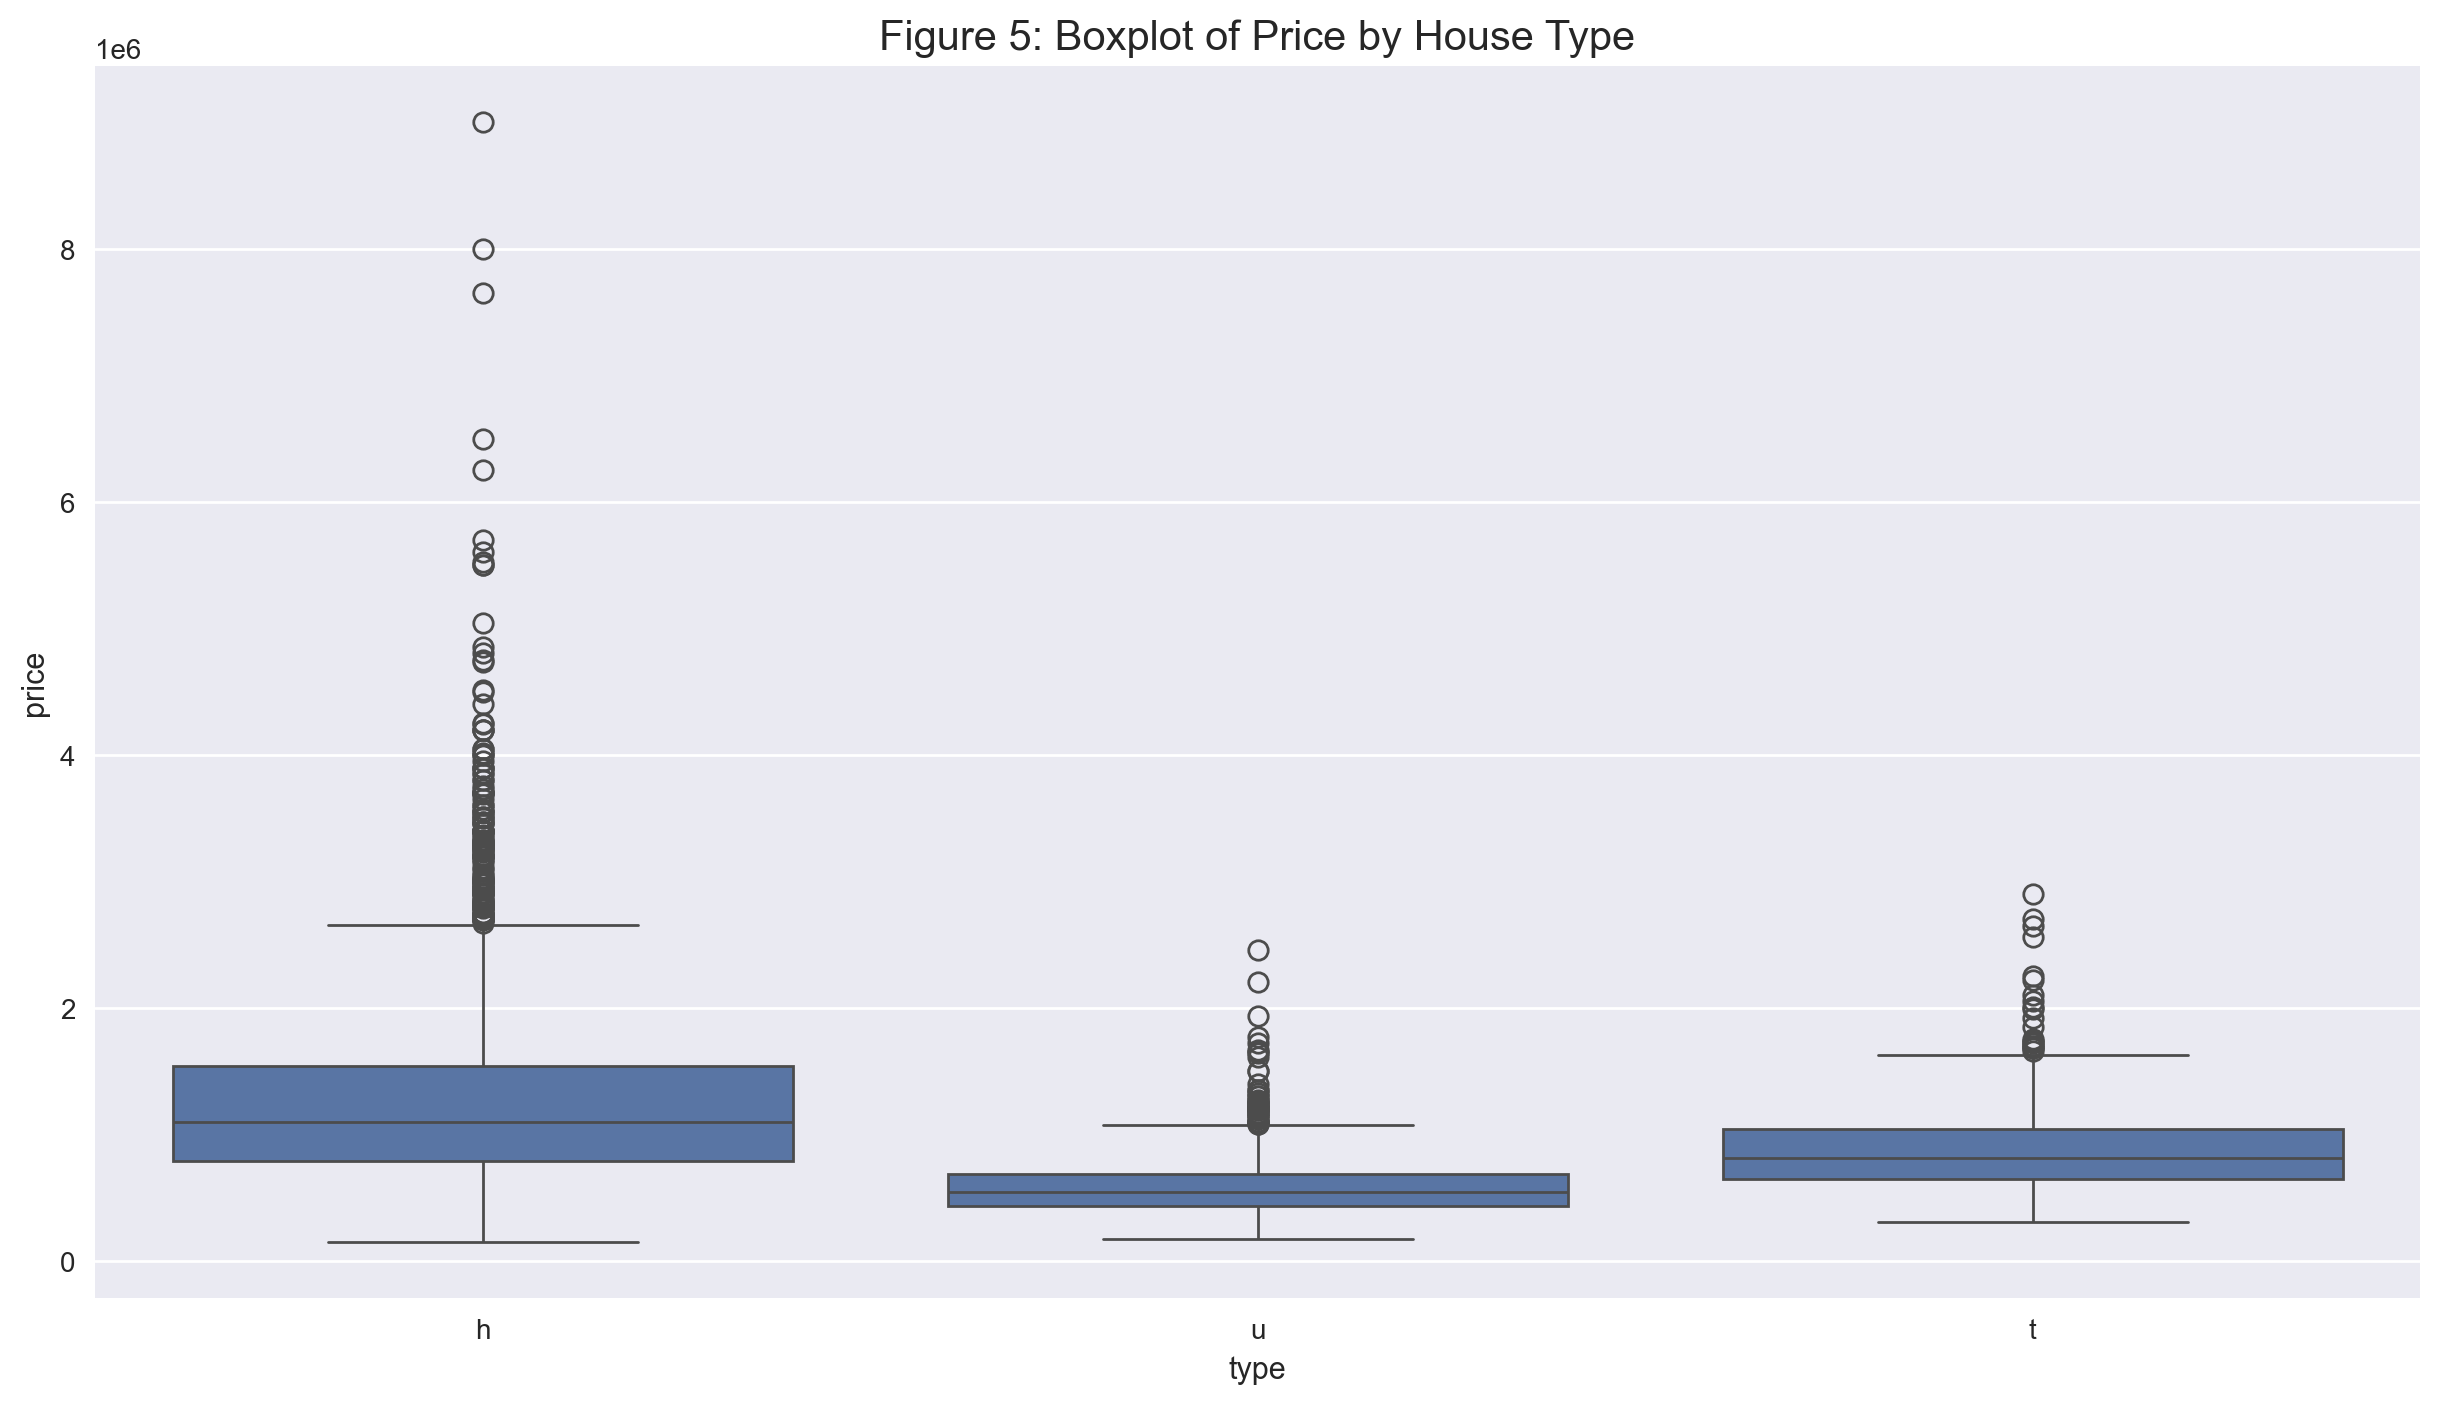

In [22]:
plt.figure(figsize = (15,8))

sns.boxplot(x='type', y='price', data=melb_df);

plt.title('Figure 5: Boxplot of Price by House Type', fontsize = 15)
plt.show();

#### Boxplot of Price by Number of Rooms

In figure 6, the price tends to increase as the number of rooms increases. 

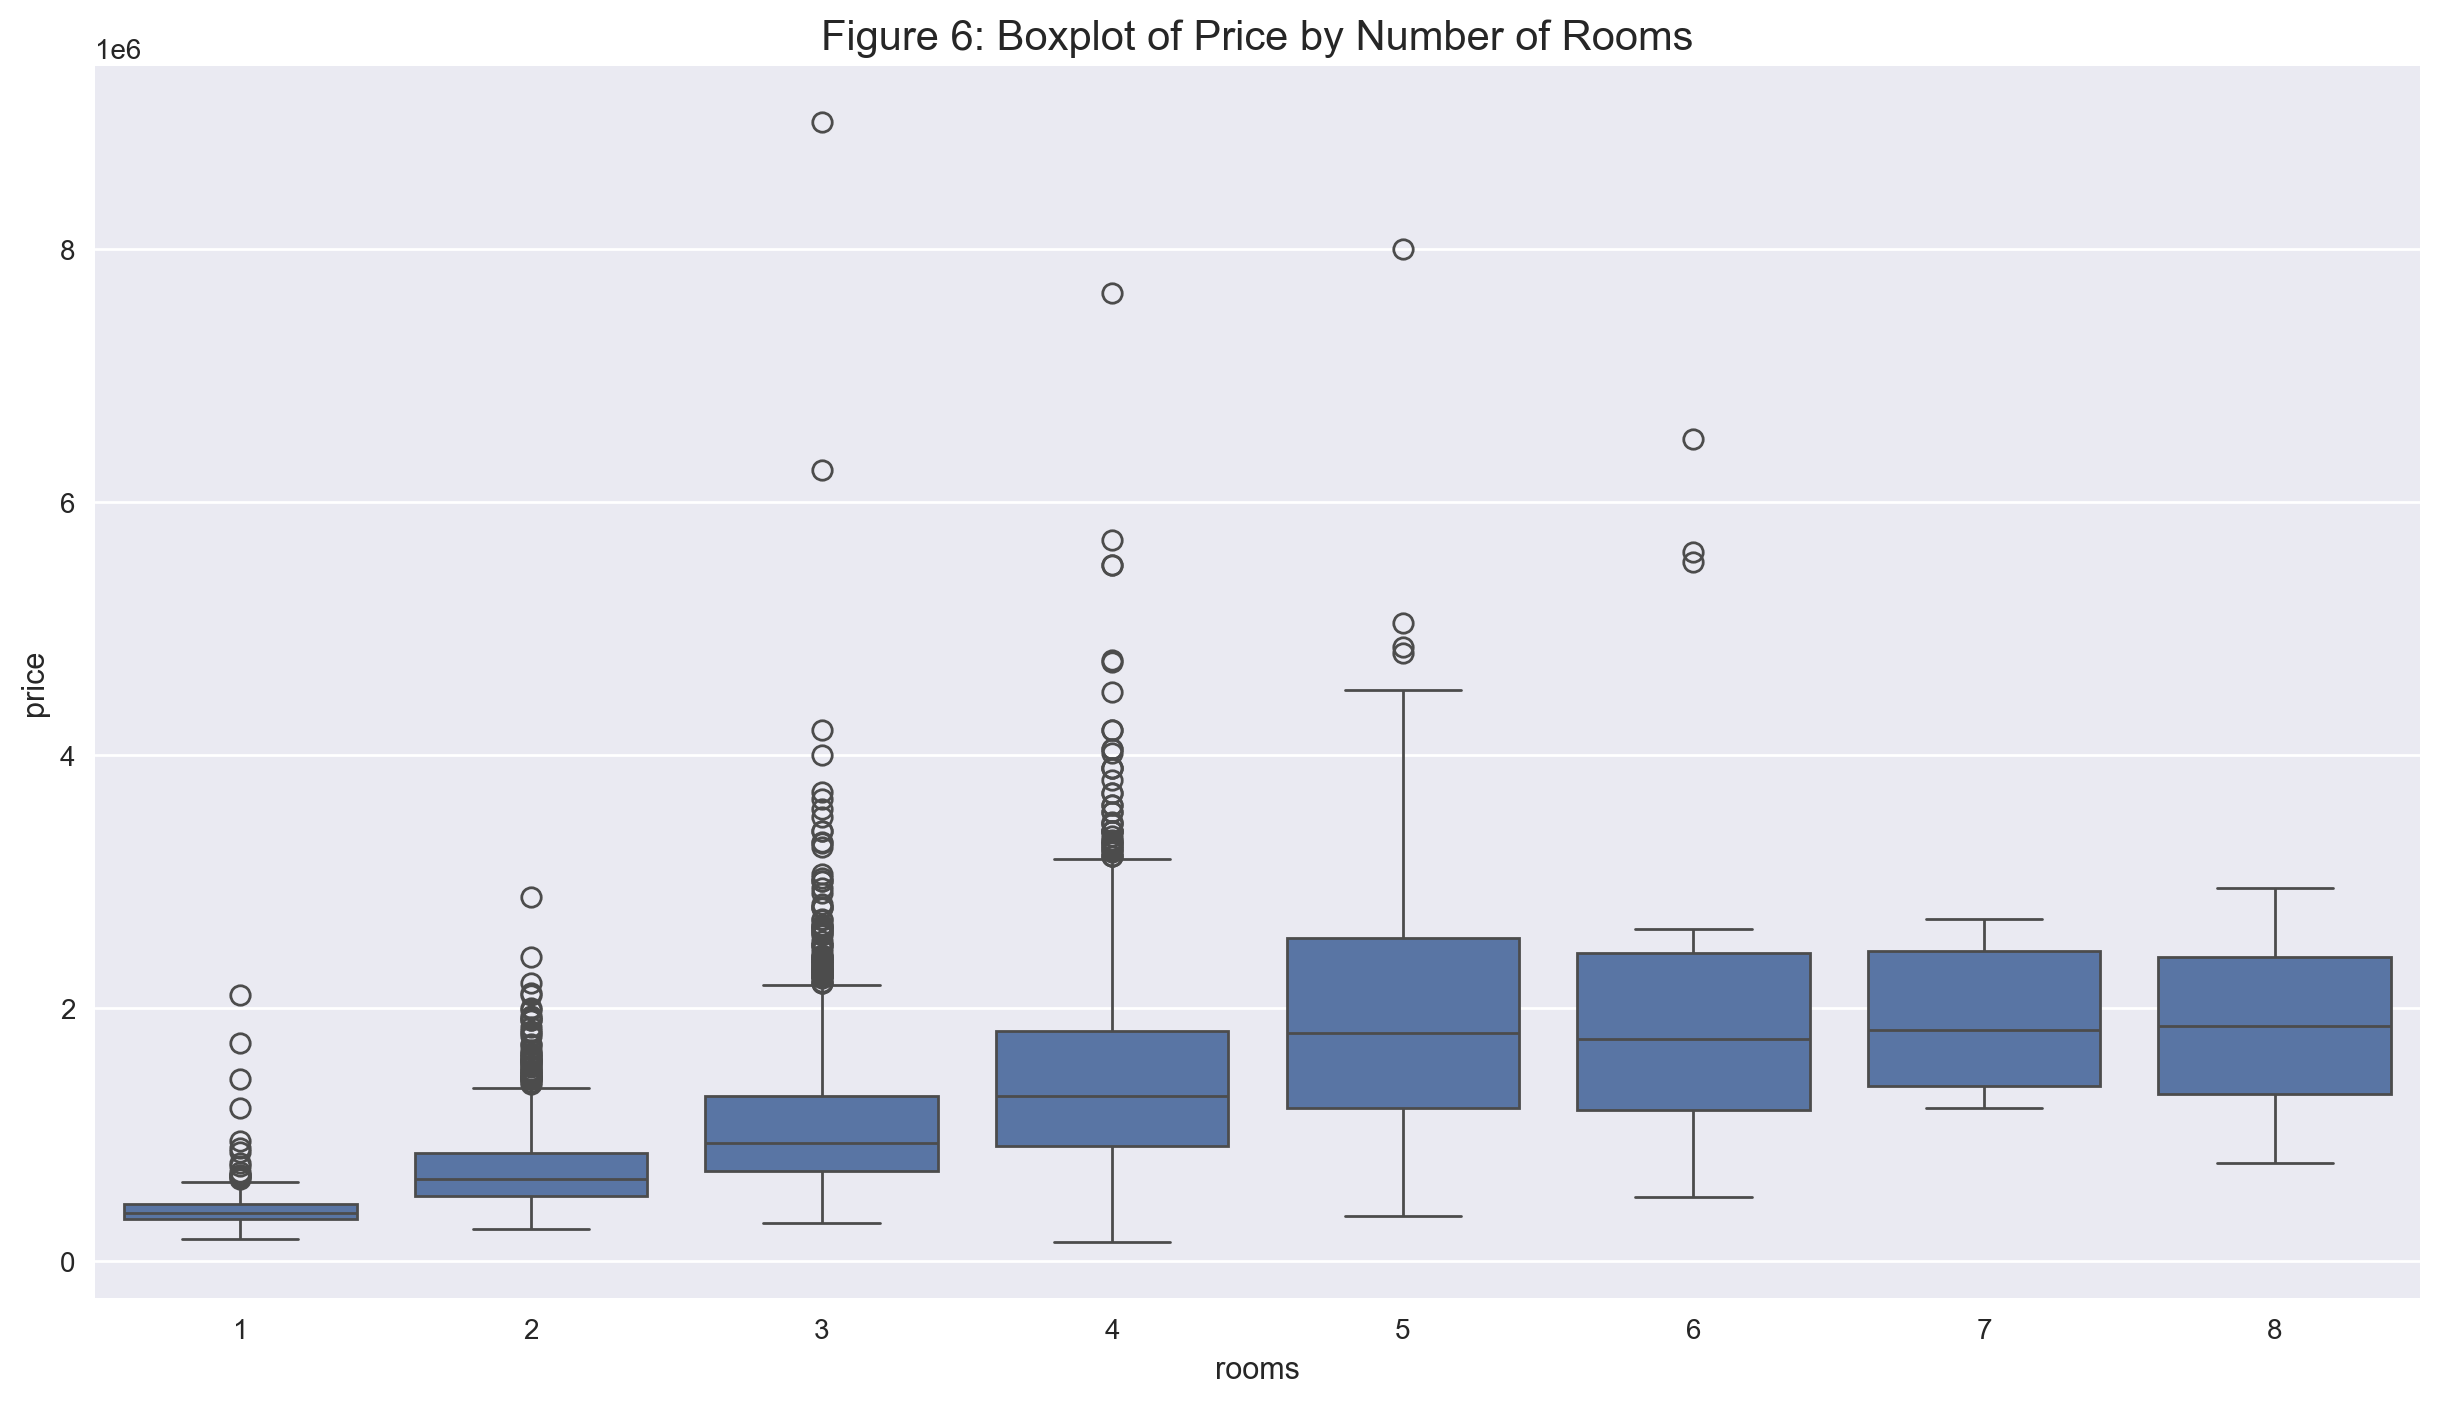

In [23]:
plt.figure(figsize = (15,8))
sns.boxplot(x='rooms', y='price', data=melb_df)
plt.title('Figure 6: Boxplot of Price by Number of Rooms', fontsize = 15)
plt.show();

### Three-Variable Visualisation

#### Boxplot of Price broken down by Method and House Type

We can clearly see that in figure 7, the comparison between house type and price in different method is somewhat comparable. There is no significant difference. 

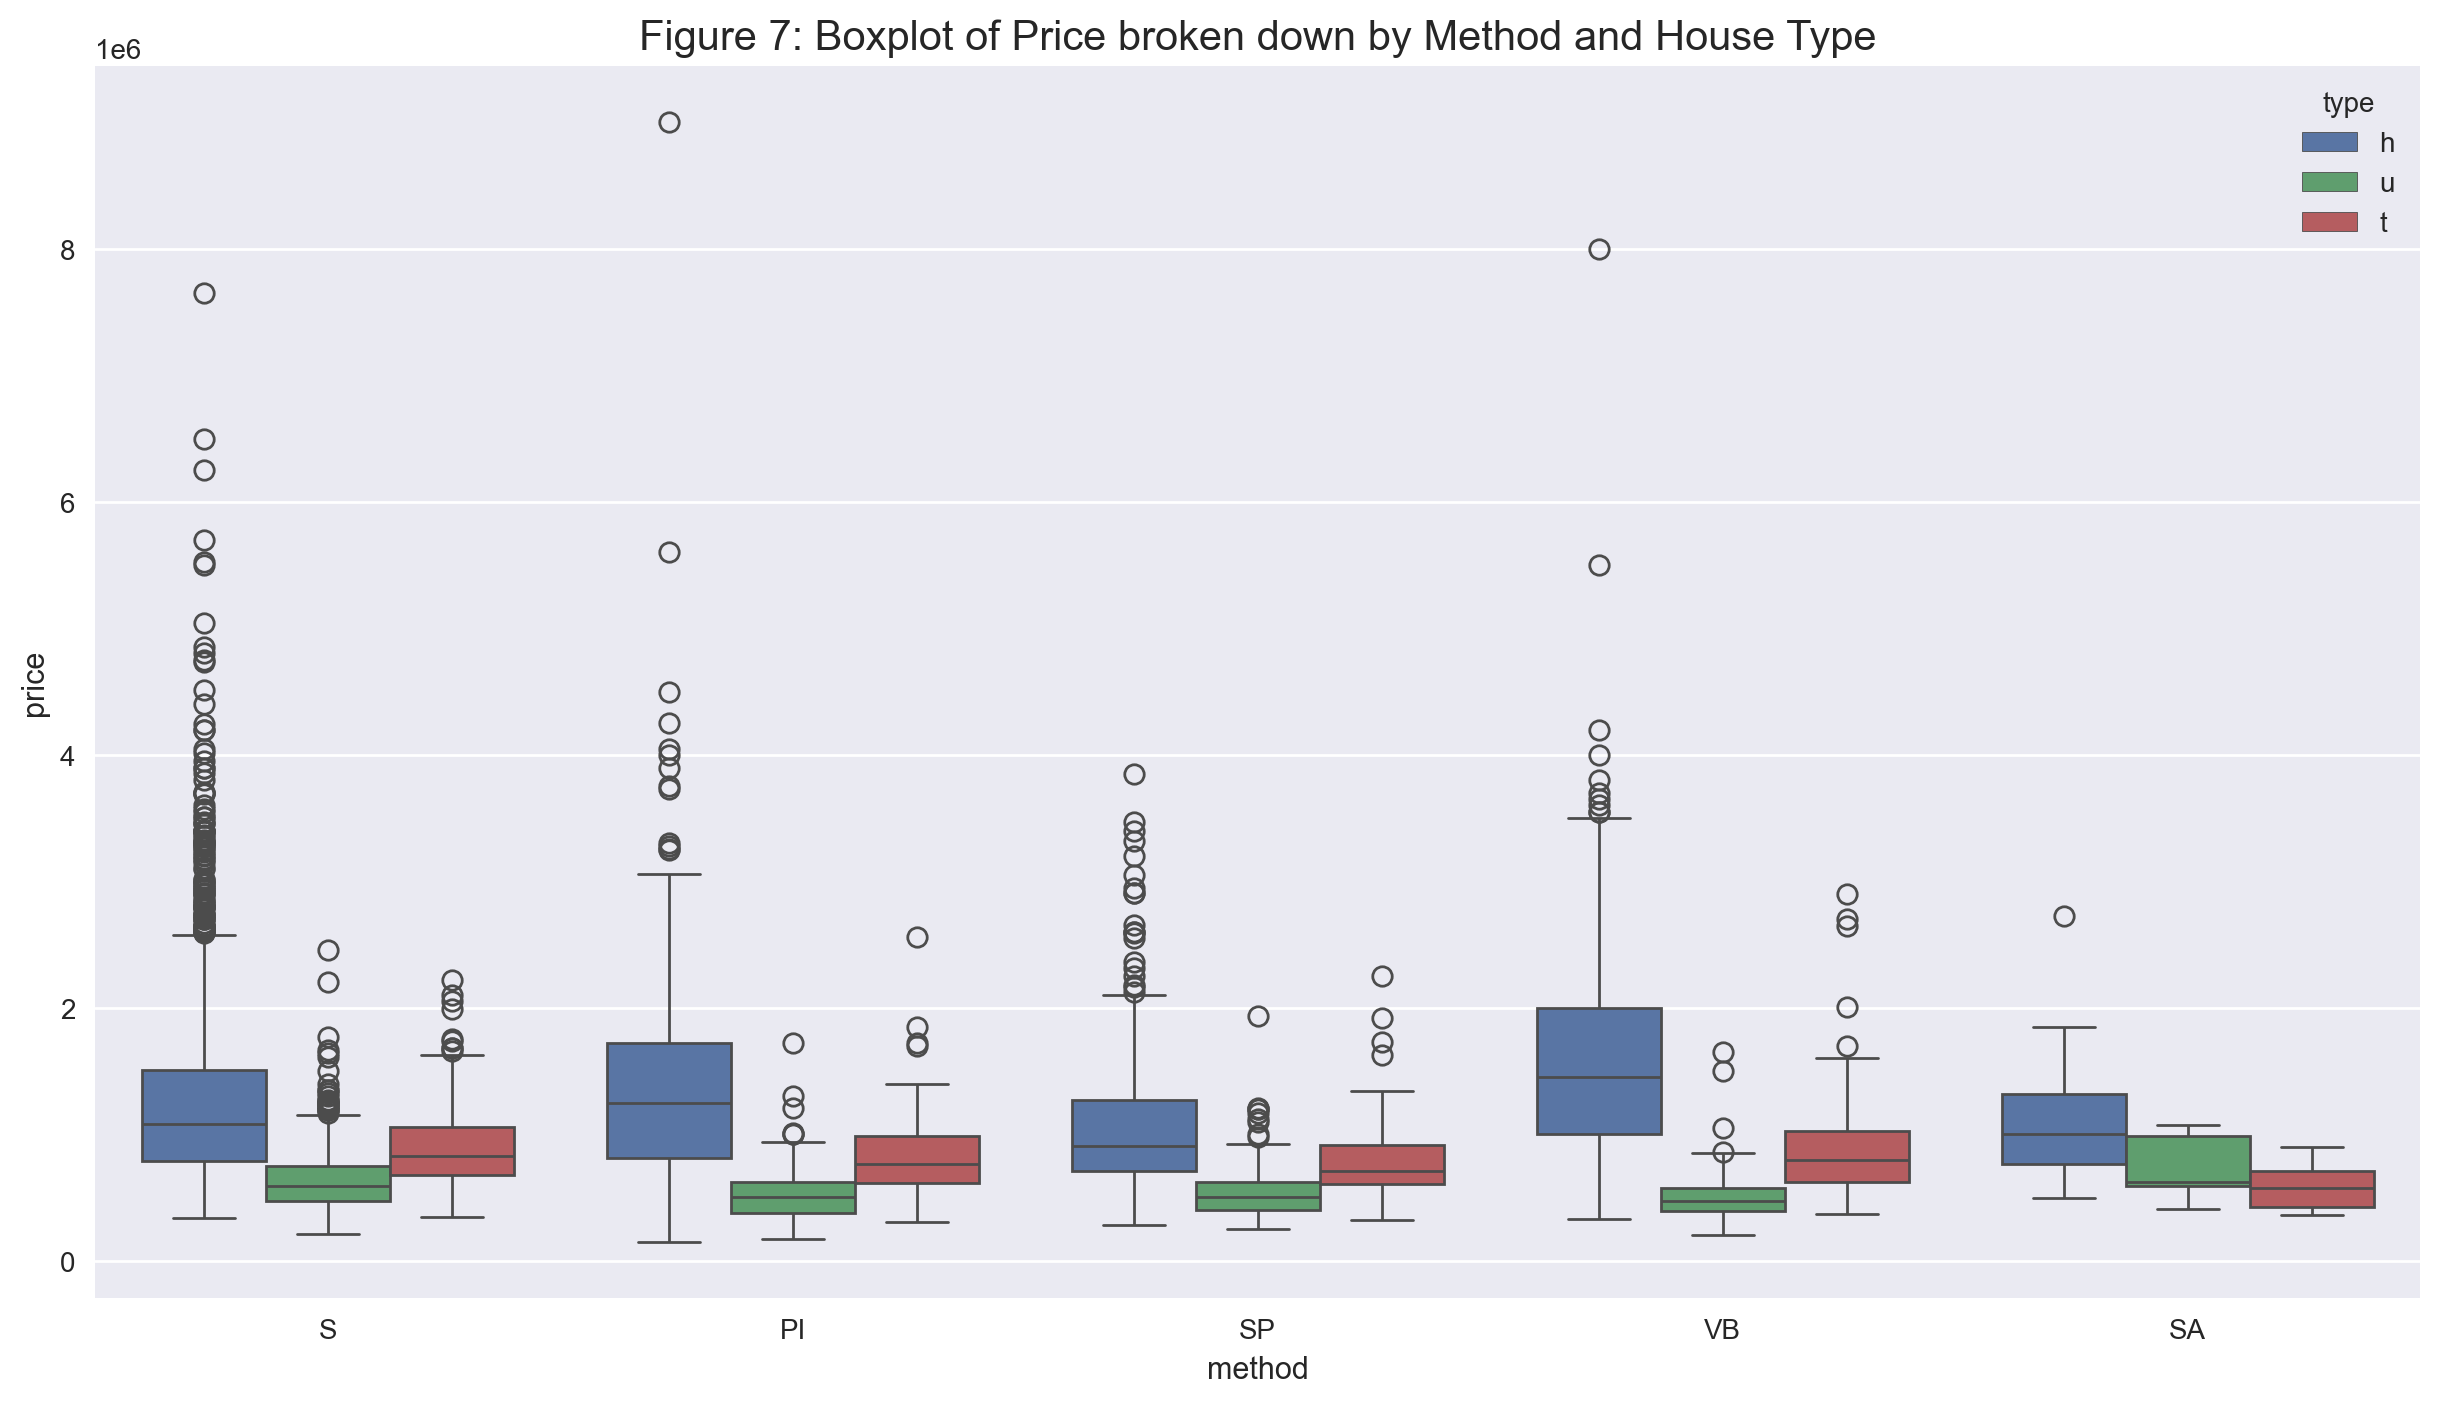

In [24]:
plt.figure(figsize = (15,8))

sns.boxplot(x='method', y='price', data=melb_df, hue='type');

plt.title('Figure 7: Boxplot of Price broken down by Method and House Type', fontsize = 15)
plt.show();

#### Scatterplot of Price by Distance from Central Business District (CBD) and House Type

Figure 8 shows that U house type (unit, duplex) tends to be closer to CBD and have a lower price, based on the clustering of the red points in the lower left corner of the plot.

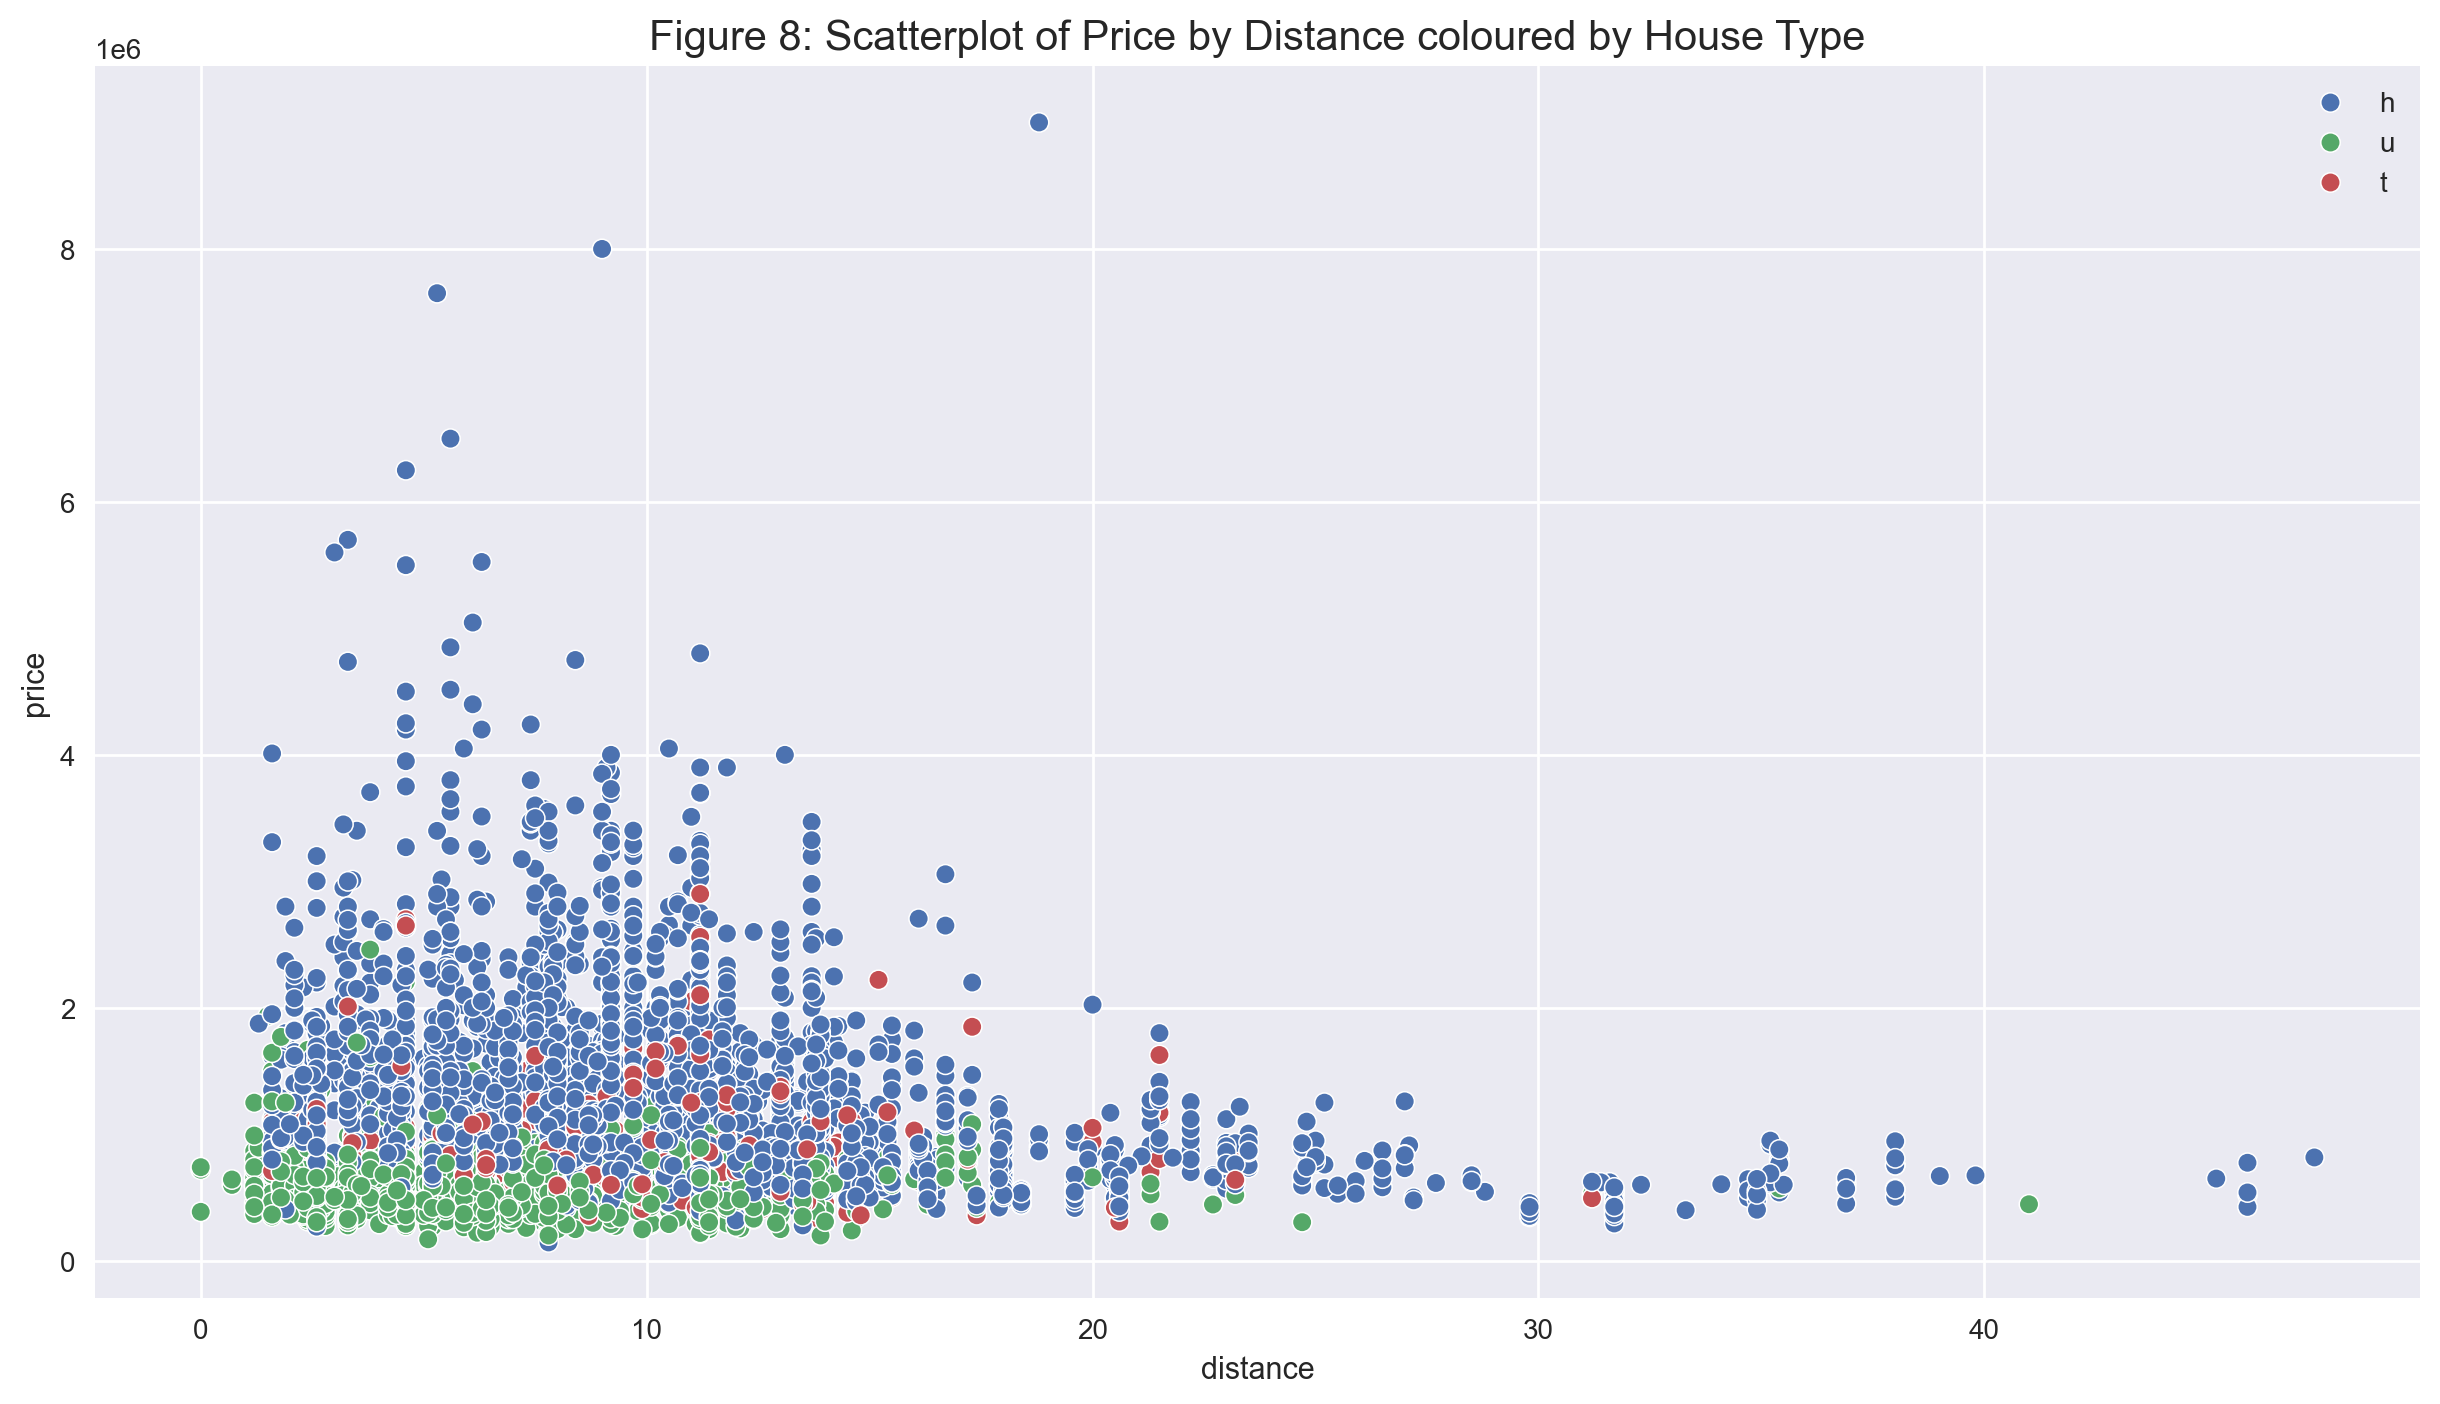

In [25]:
plt.figure(figsize = (15,8))
sns.scatterplot(x='distance', y='price', hue='type', data=melb_df)
plt.title('Figure 8: Scatterplot of Price by Distance coloured by House Type', fontsize = 15);
plt.legend(loc = 'upper right')
plt.show();

#### Barplot of Price by Month and Year Sold

Overall, we observe that the price of house sold was higher in 2017 than 2016 per month, but there is no clear pattern regarding which month has higher price of house sold. 

Text(0, 0.5, 'House Prices')

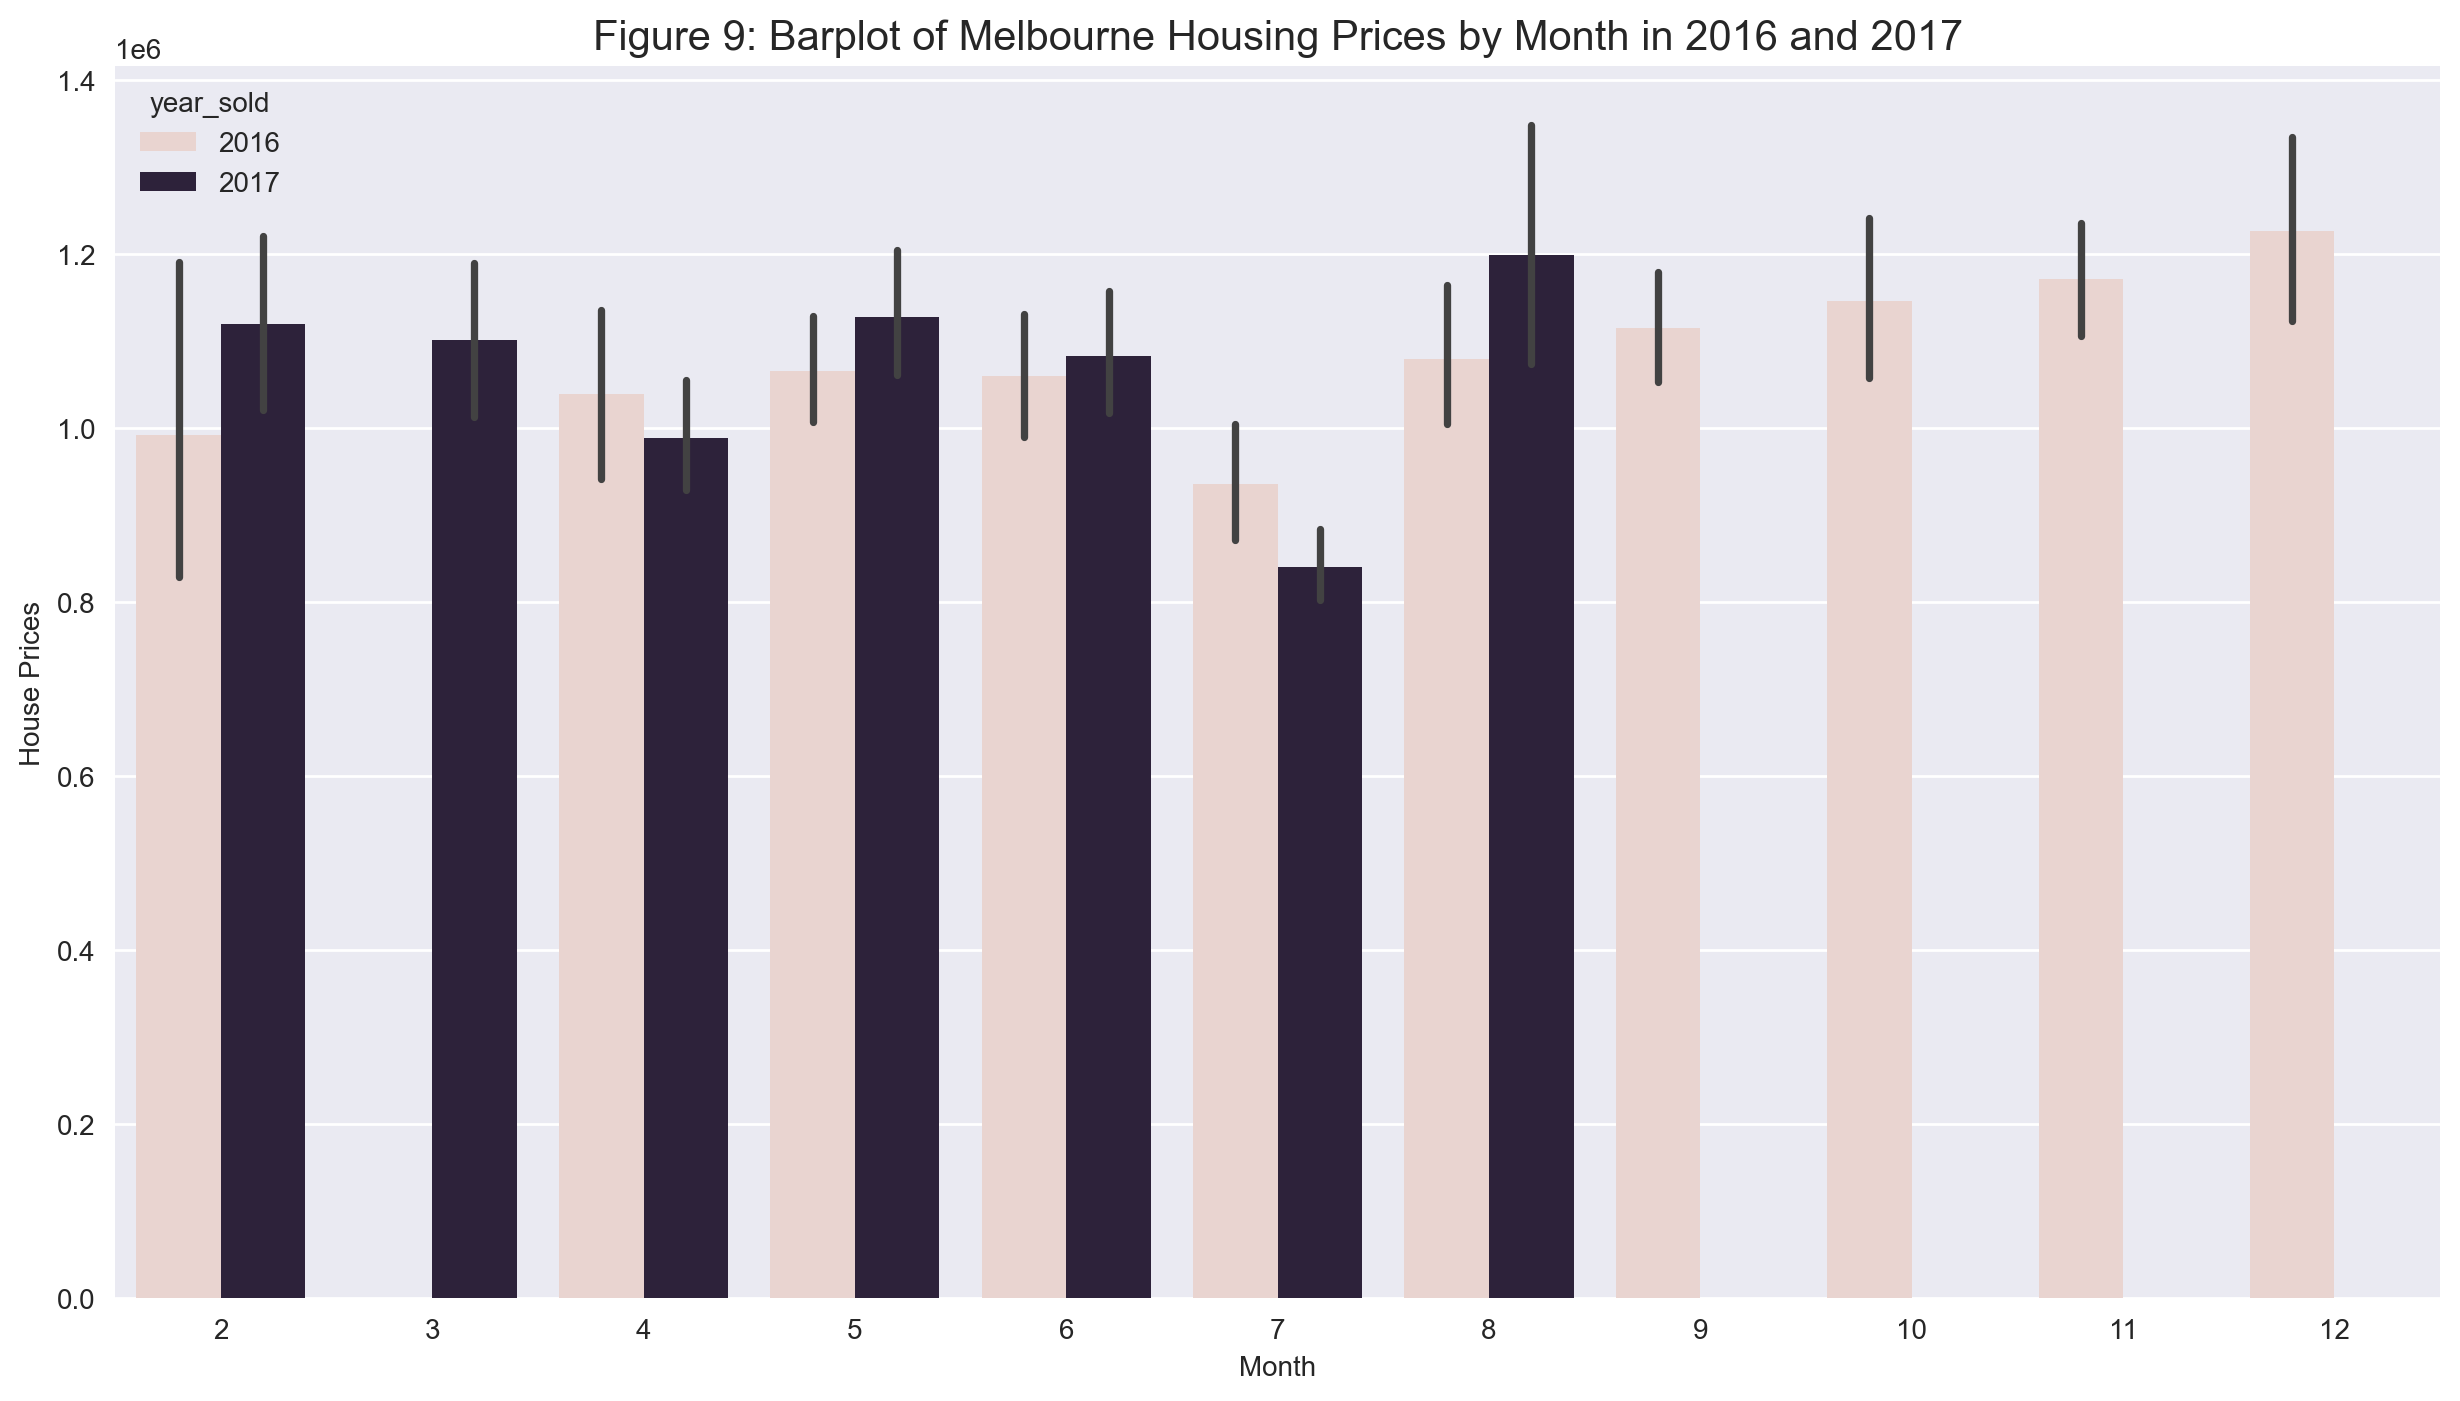

In [26]:
plt.figure(figsize = (15,8))
fig_4 = sns.barplot(x ='month_sold', y ='price', hue = 'year_sold', data = melb_df)
plt.title('Figure 9: Barplot of Melbourne Housing Prices by Month in 2016 and 2017', fontsize = 15)
plt.xlabel('Month', fontsize = 10)
plt.ylabel('House Prices', fontsize = 10) 

## Summary and Conclusions

Accurate prediction of house prices has many practical applications for all stakeholders; including buyers, sellers, banks, and real-estate agencies. Without a doubt, a model that can reliably predict a house's actual sale price would be indispensable  for healthy functioning of the housing market. Our goal in this project is to investigate if we can come up with a reliable model for predicting house prices using the Melbourne House Prices dataset.

In Phase I of this project, we undertook the tasks of data cleaning & preprocessing and data visualisation. First we decided to drop two variables which we considered to be not useful for predictive modelling, namely the `Postcode` and `Bedroom2` variables. We also checked the data for any missing values and outliers, and we decided to remove any rows containing such data quality issues. There was not much cleaning needed, as the data seemed to be relatively clean to begin with. Furthermore, we sampled the data to get only 5000 random rows to save time when running models in the second phase of this project.

We generated several visualisations in order to explore the data. Using the explanatory variables, we clearly see that Southern Metropolitan region has the highest count of selling Melbourne houses. During the years 2016 and 2017, the house prices in Melbourne only have a slight difference in prices which we can see that 2017 has more houses sold than 2016. Furthermore, in the years 2016 and 2017, the unit/ duplex house prices tend to be lower when it is closer to CBD than houses and townhouses. Therefore, Melbourne house prices tend to fluctuate more when people buy houses from popular region areas or CBD in Melbourne. 

We also observed that some of the numerical data are skewed, including the target feature, Price. Scaling/ transformation of the data will be needed to address this issue. We have seen that house types, distance from CBD, and number of rooms are few of the most significant features in determining the house price. However, further analysis needs be done in order to identify any further relationships. 

## References

- Becker, D. (n.d.). Melbourne Housing Snapshot (Kaggle). Retrieved September 21, 2021 from https://www.kaggle.com/dansbecker/melbourne-housing-snapshot

***